In [4]:
import os, scipy, scprep
from scipy import io
import scanpy as sc
import numpy as np
import logging
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
sdata = scanpy.read_h5ad('../data/intermediate_files/1_preprocessed_primate_data.h5ad')

In [5]:
sdata = scprep.normalize.library_size_normalize(sdata.to_df())
sdata = scprep.transform.sqrt(sdata)

/home/aarthivenkat/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [2]:
adata = sc.read_h5ad('intermediate_files/3_primate_all_cells_clustering.h5ad')

In [5]:
df = pd.read_csv('intermediate_files/2_decontx_primate_contamination_proportion.csv', index_col=0)
100 * sum(df['x'] > 0.5) / df.shape[0] 

2.224155539584673

In [7]:
df.index = adata.obs_names
df.columns = ['contamination_estimate']
df.to_csv('revision_results/primate_all_cells/2_decontx_primate_contamination_proportion.csv')

In [18]:
cluster_conv = {'0': '2', '1': '1', '2':'3', '3':'4', '4':'5'}
adata.obs['clusters_res_0.1'] = [cluster_conv[x] for x in adata.obs['clusters_res_0.1']]

In [19]:
clusters = adata.obs['clusters_res_0.1']

In [20]:
adata = adata.to_df()

In [21]:
sdata = sc.AnnData(sdata)
sdata.obs['clusters'] = clusters

In [22]:
adata = sc.AnnData(adata)
adata.obs['clusters'] = clusters

In [23]:
sc.set_figure_params(dpi=200, dpi_save=300)

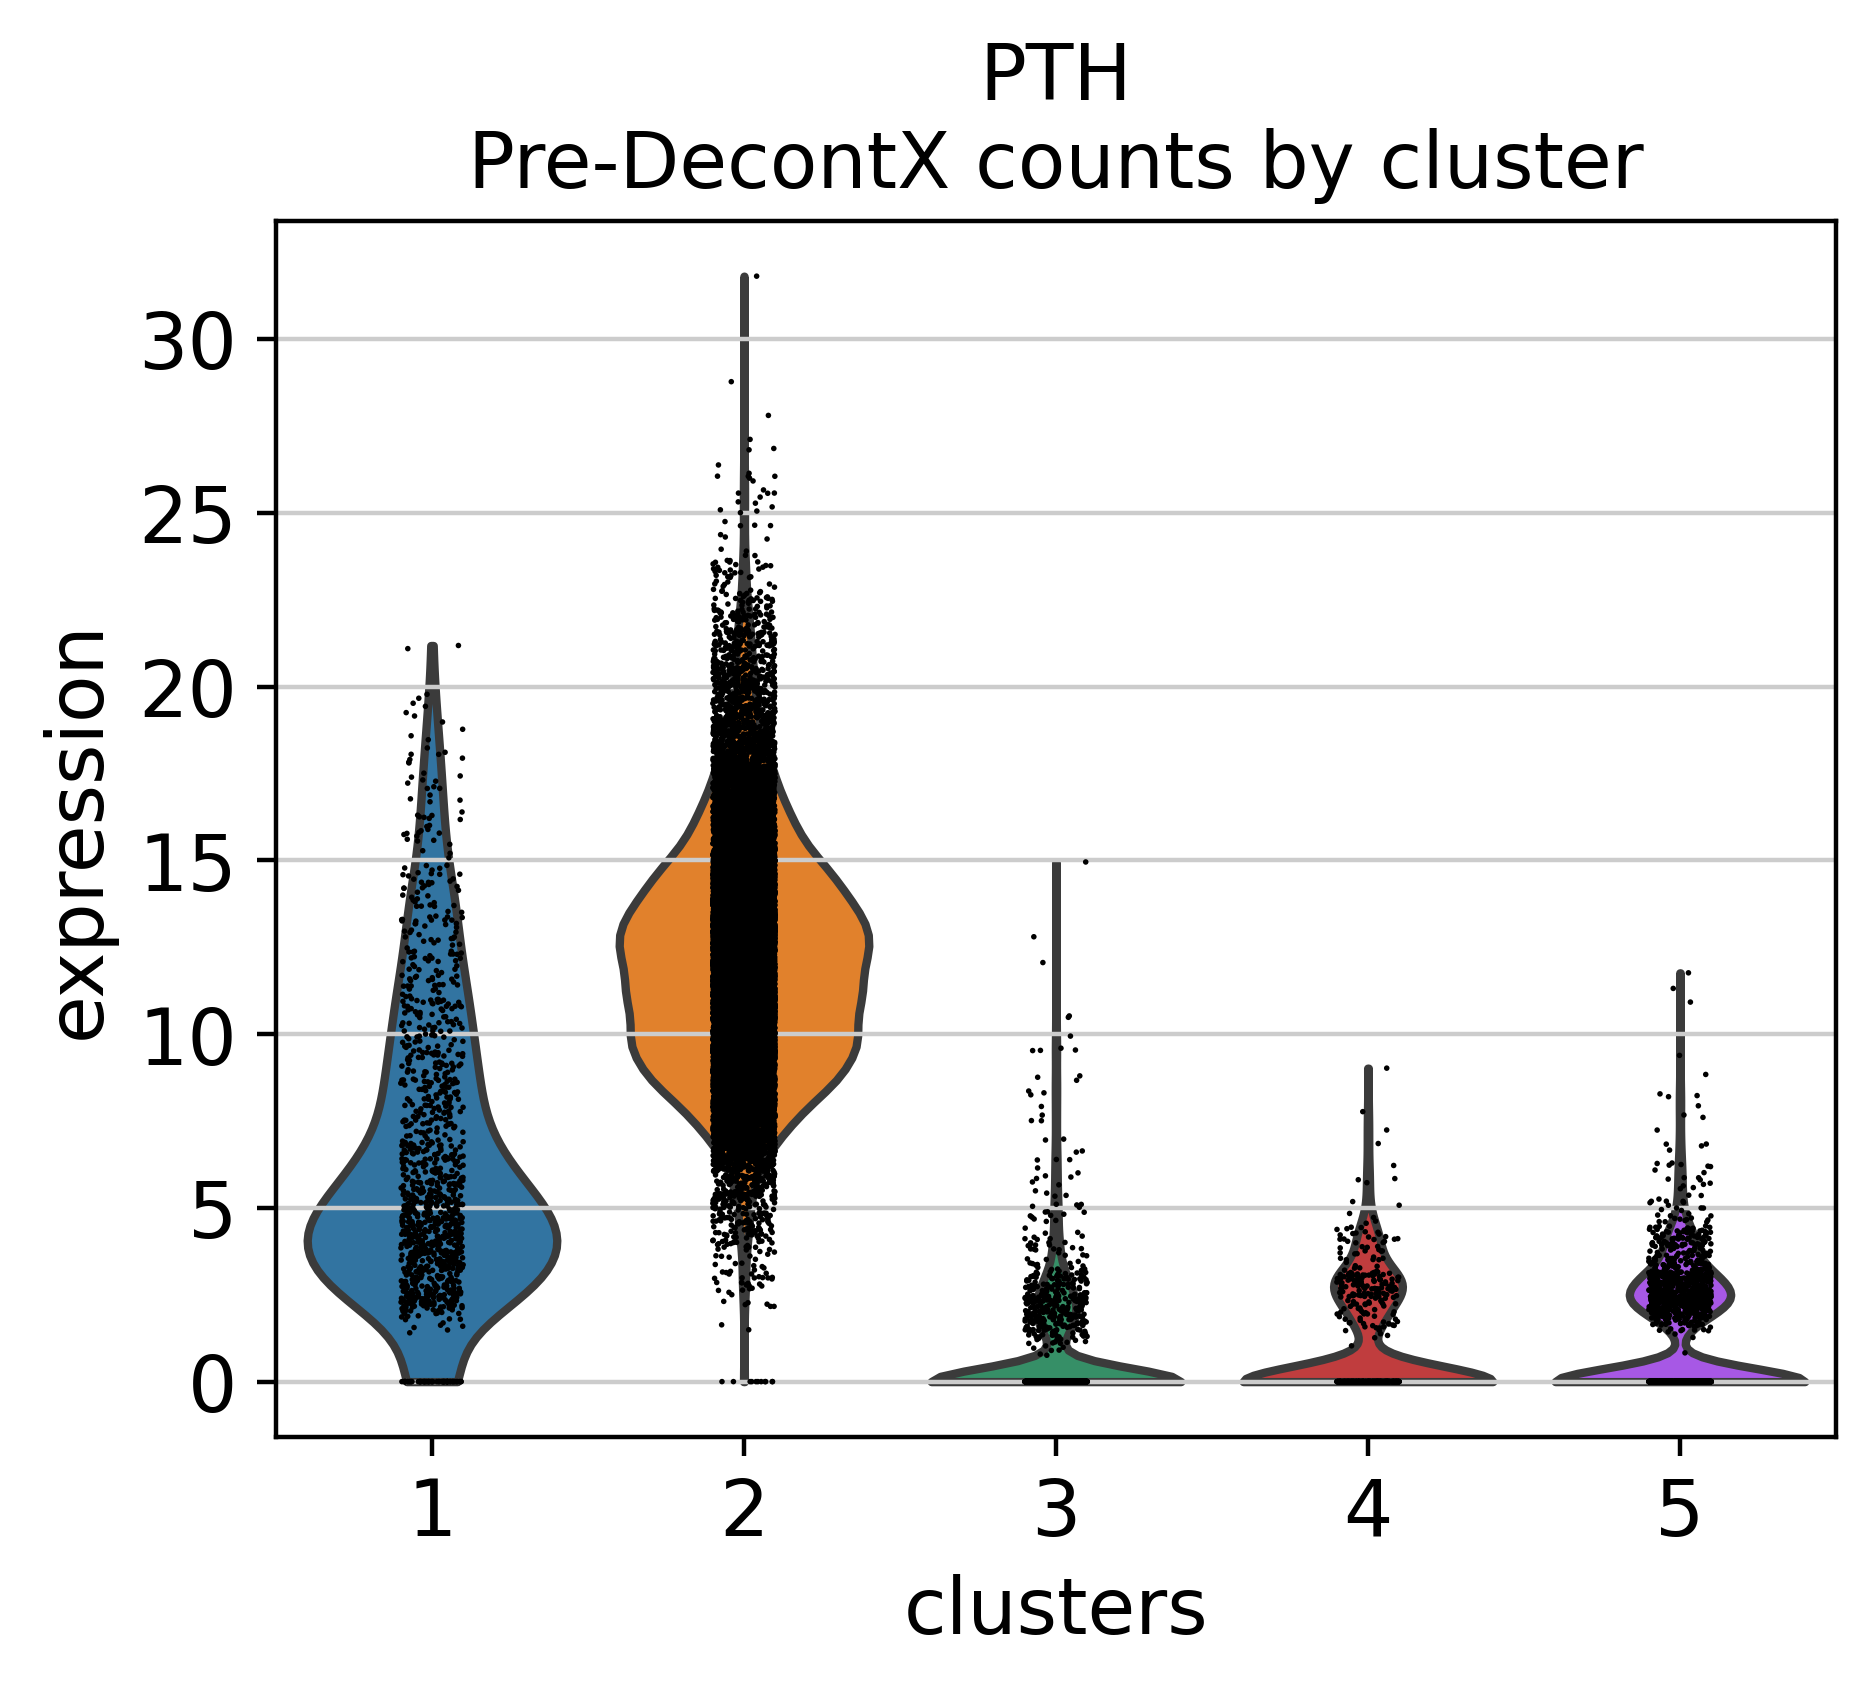

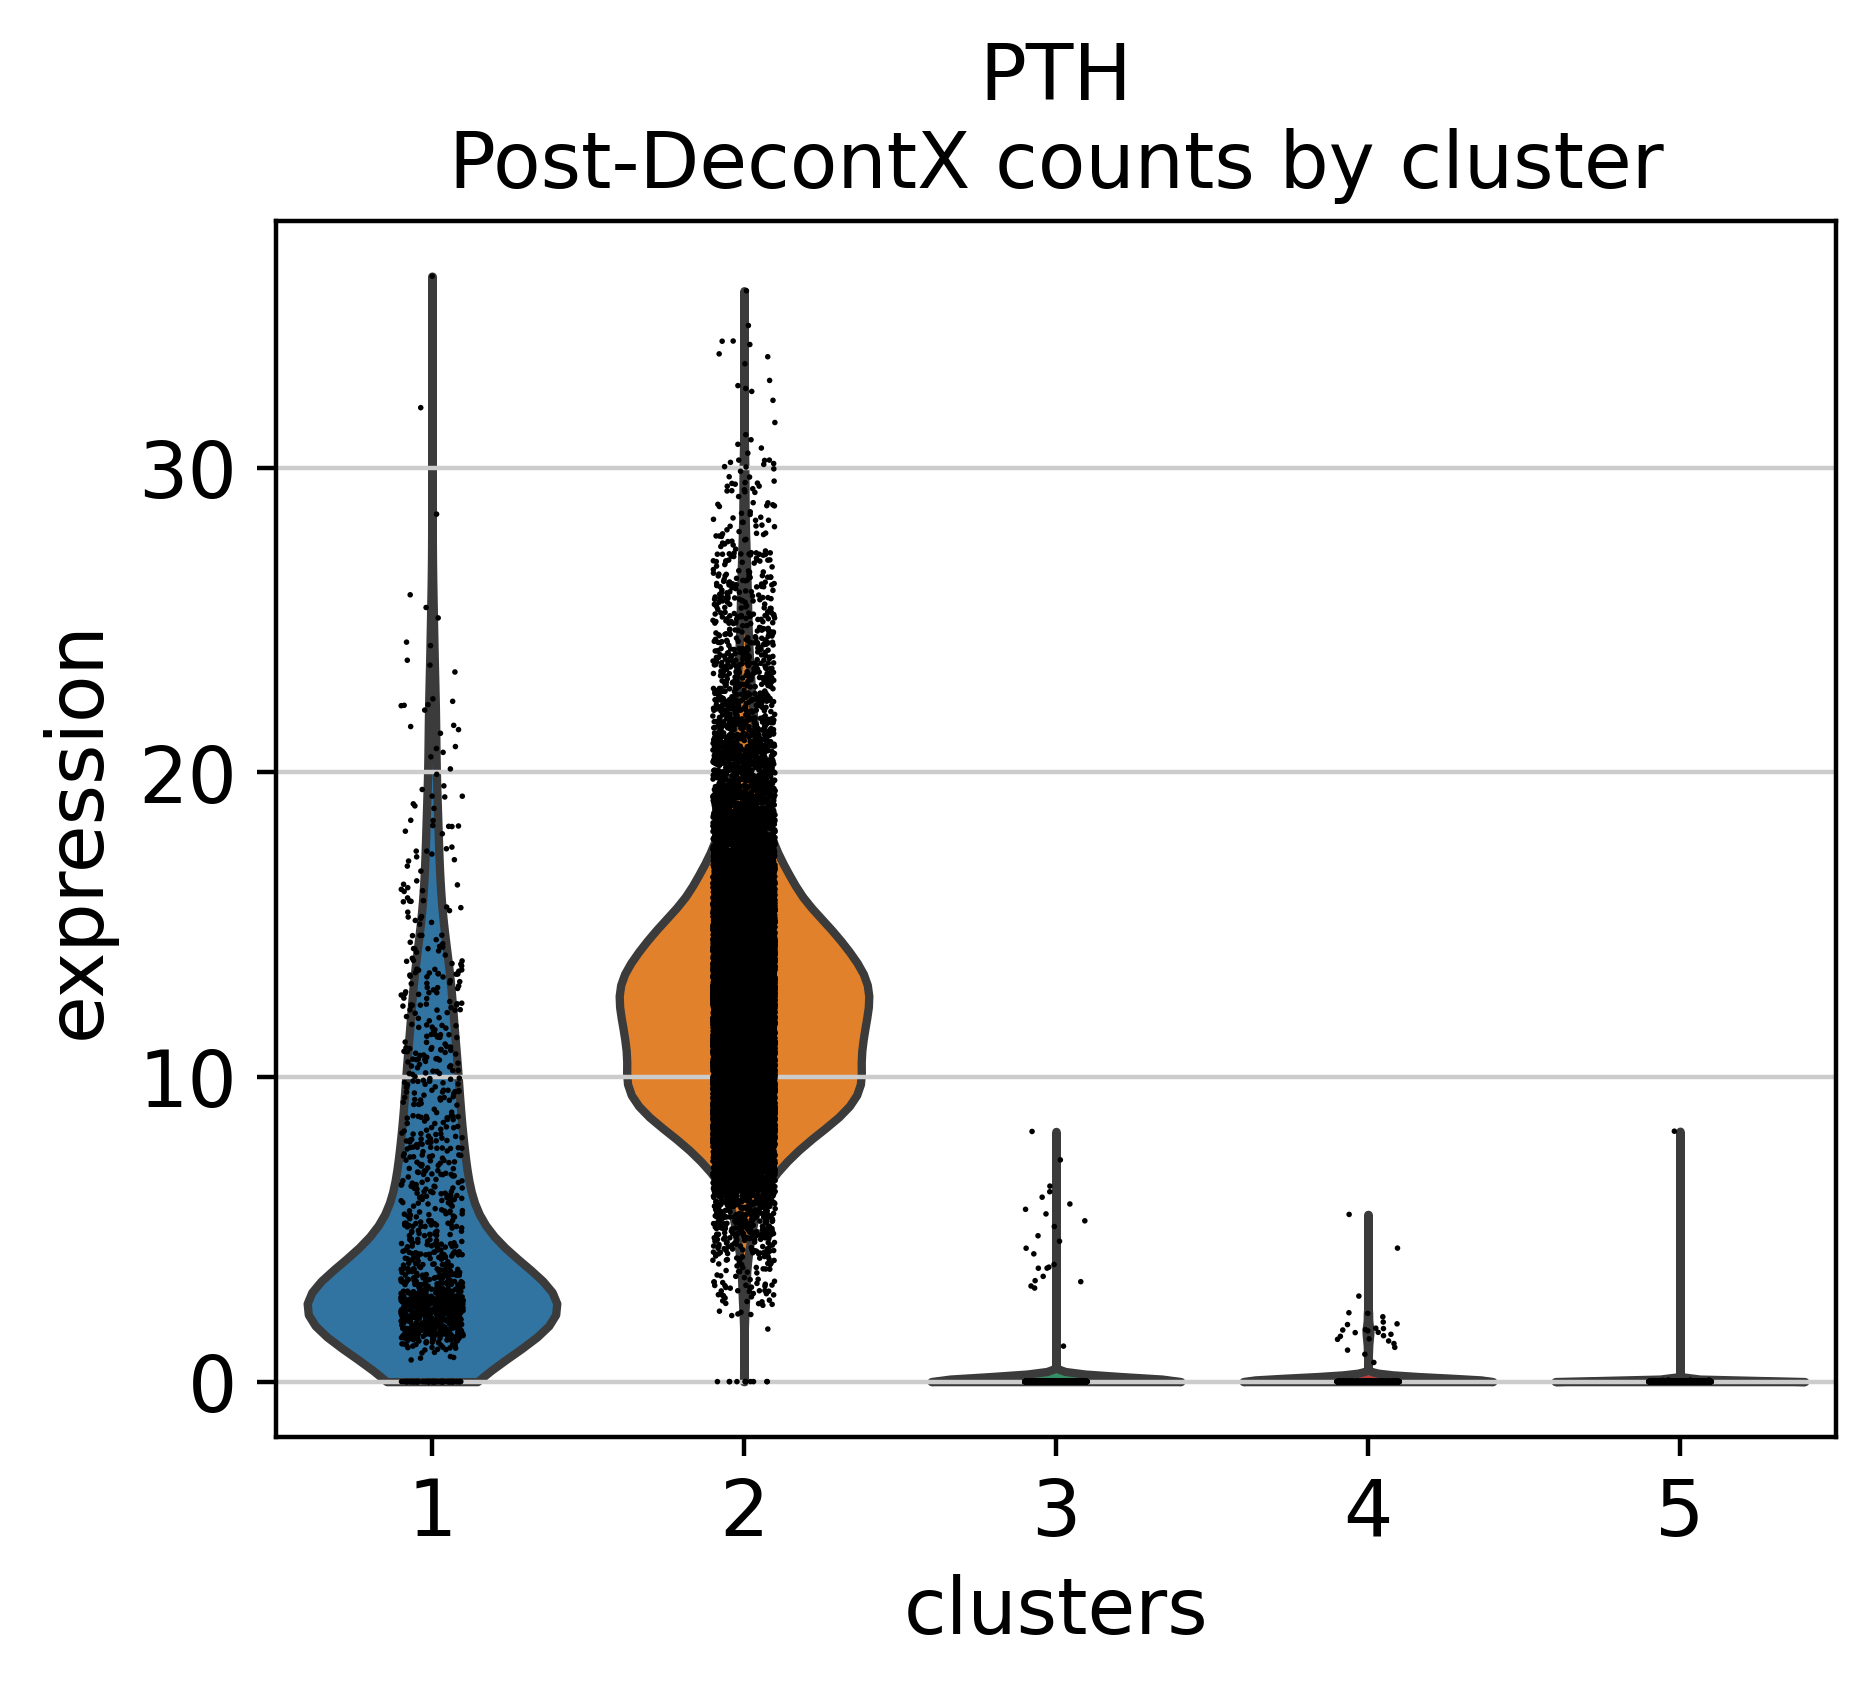

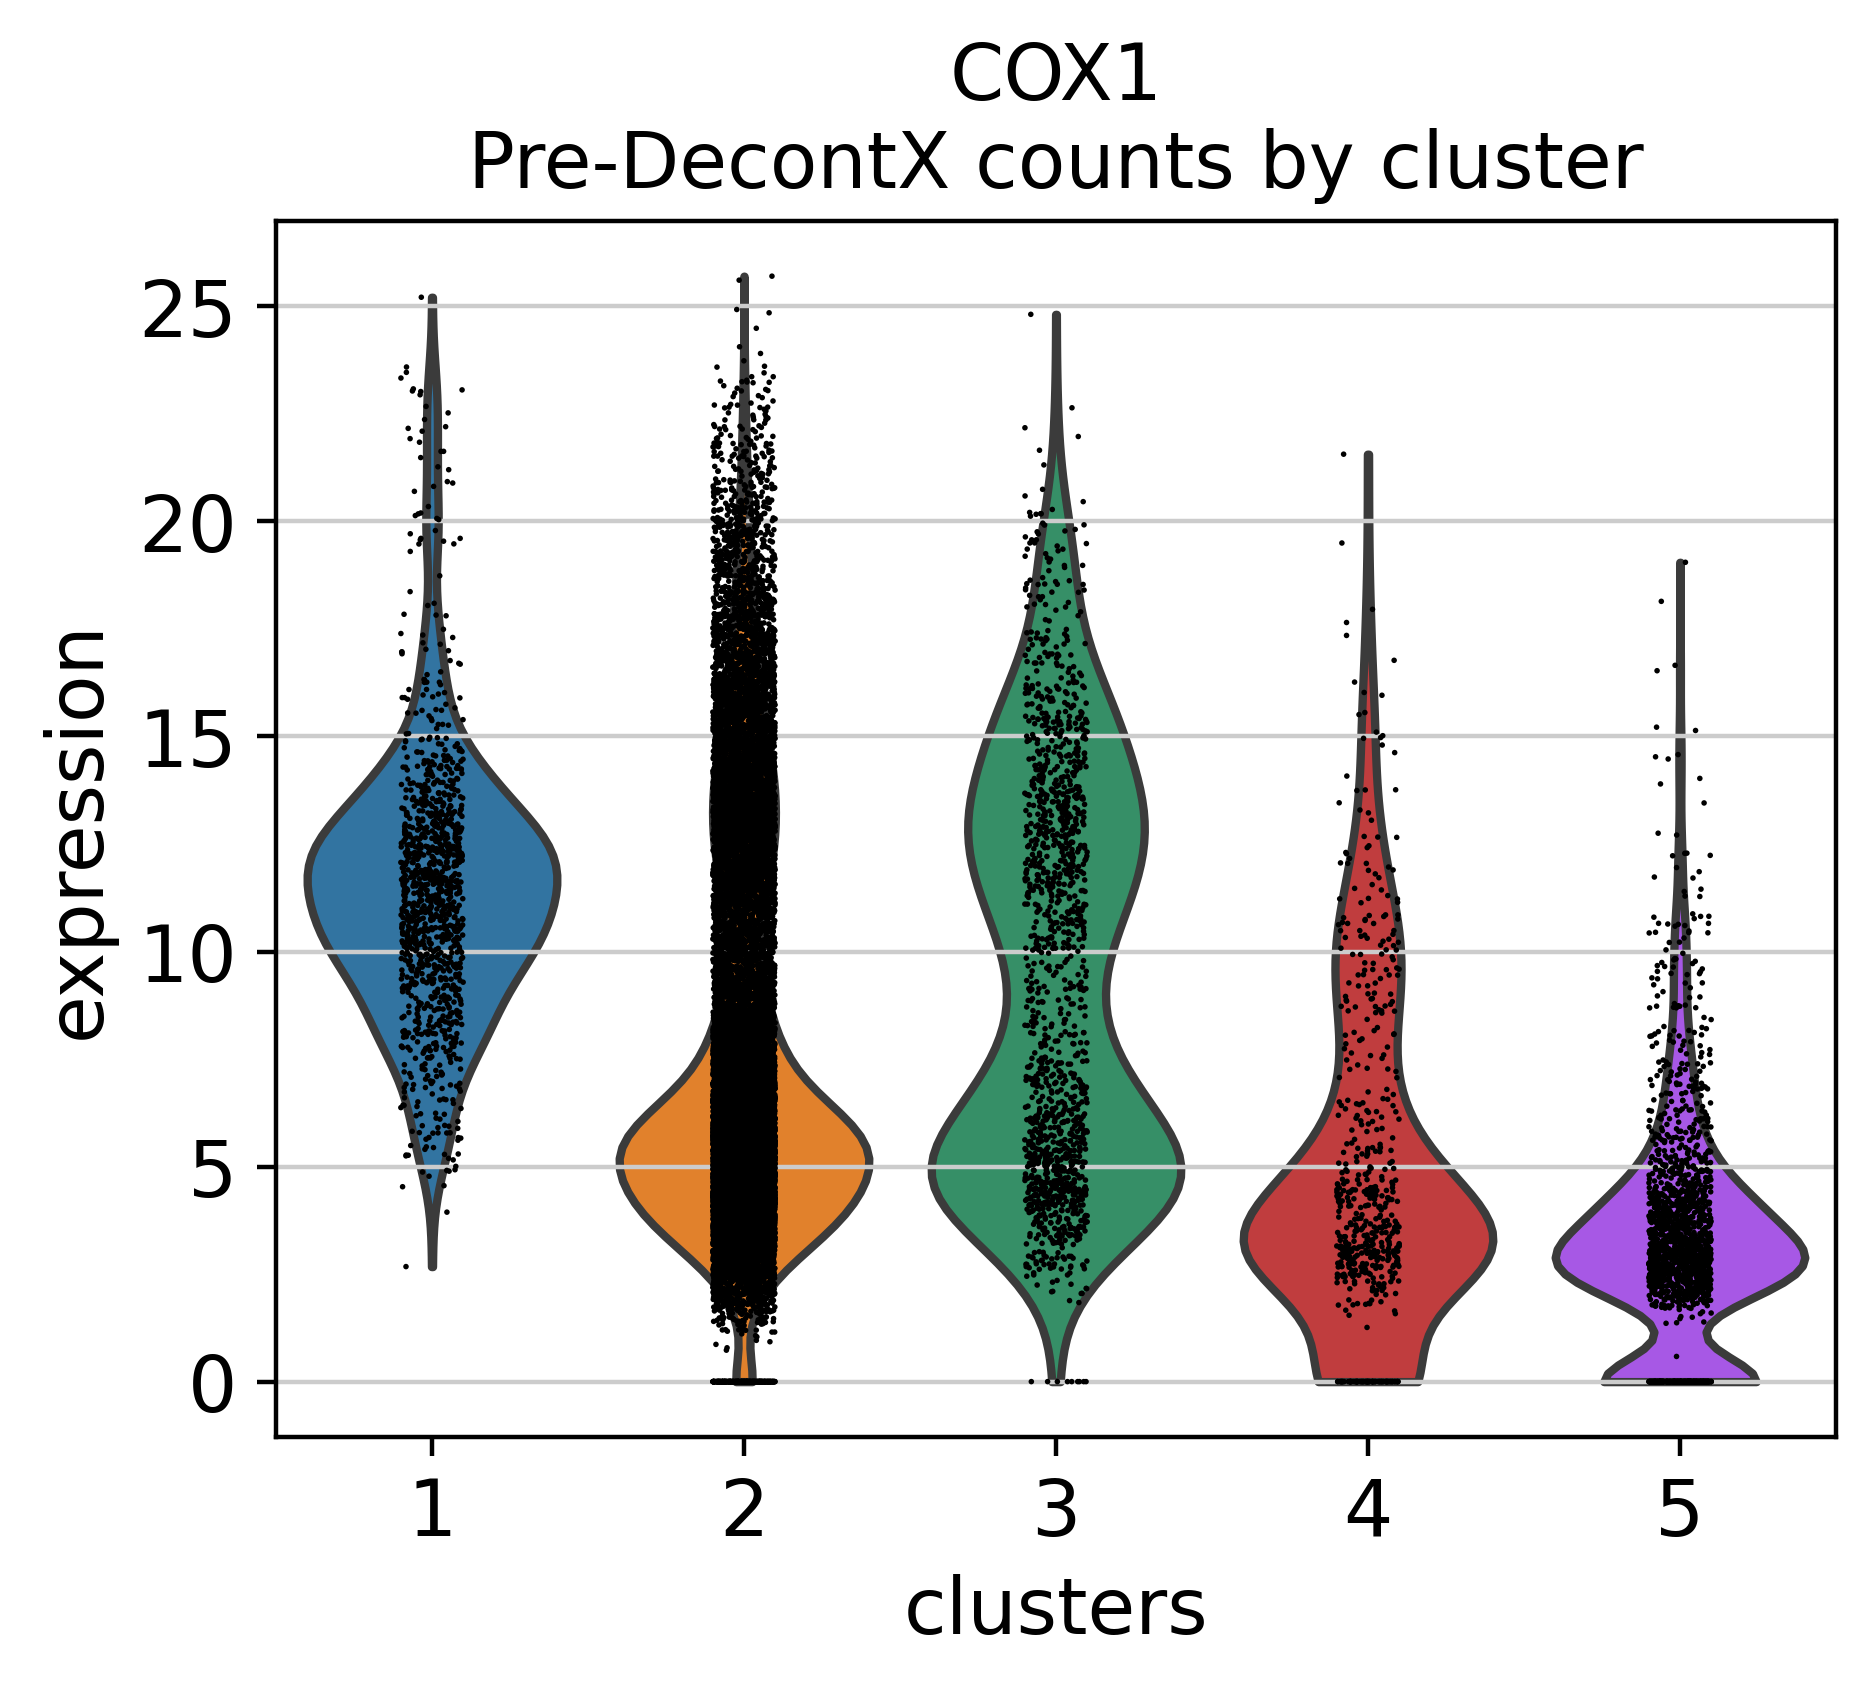

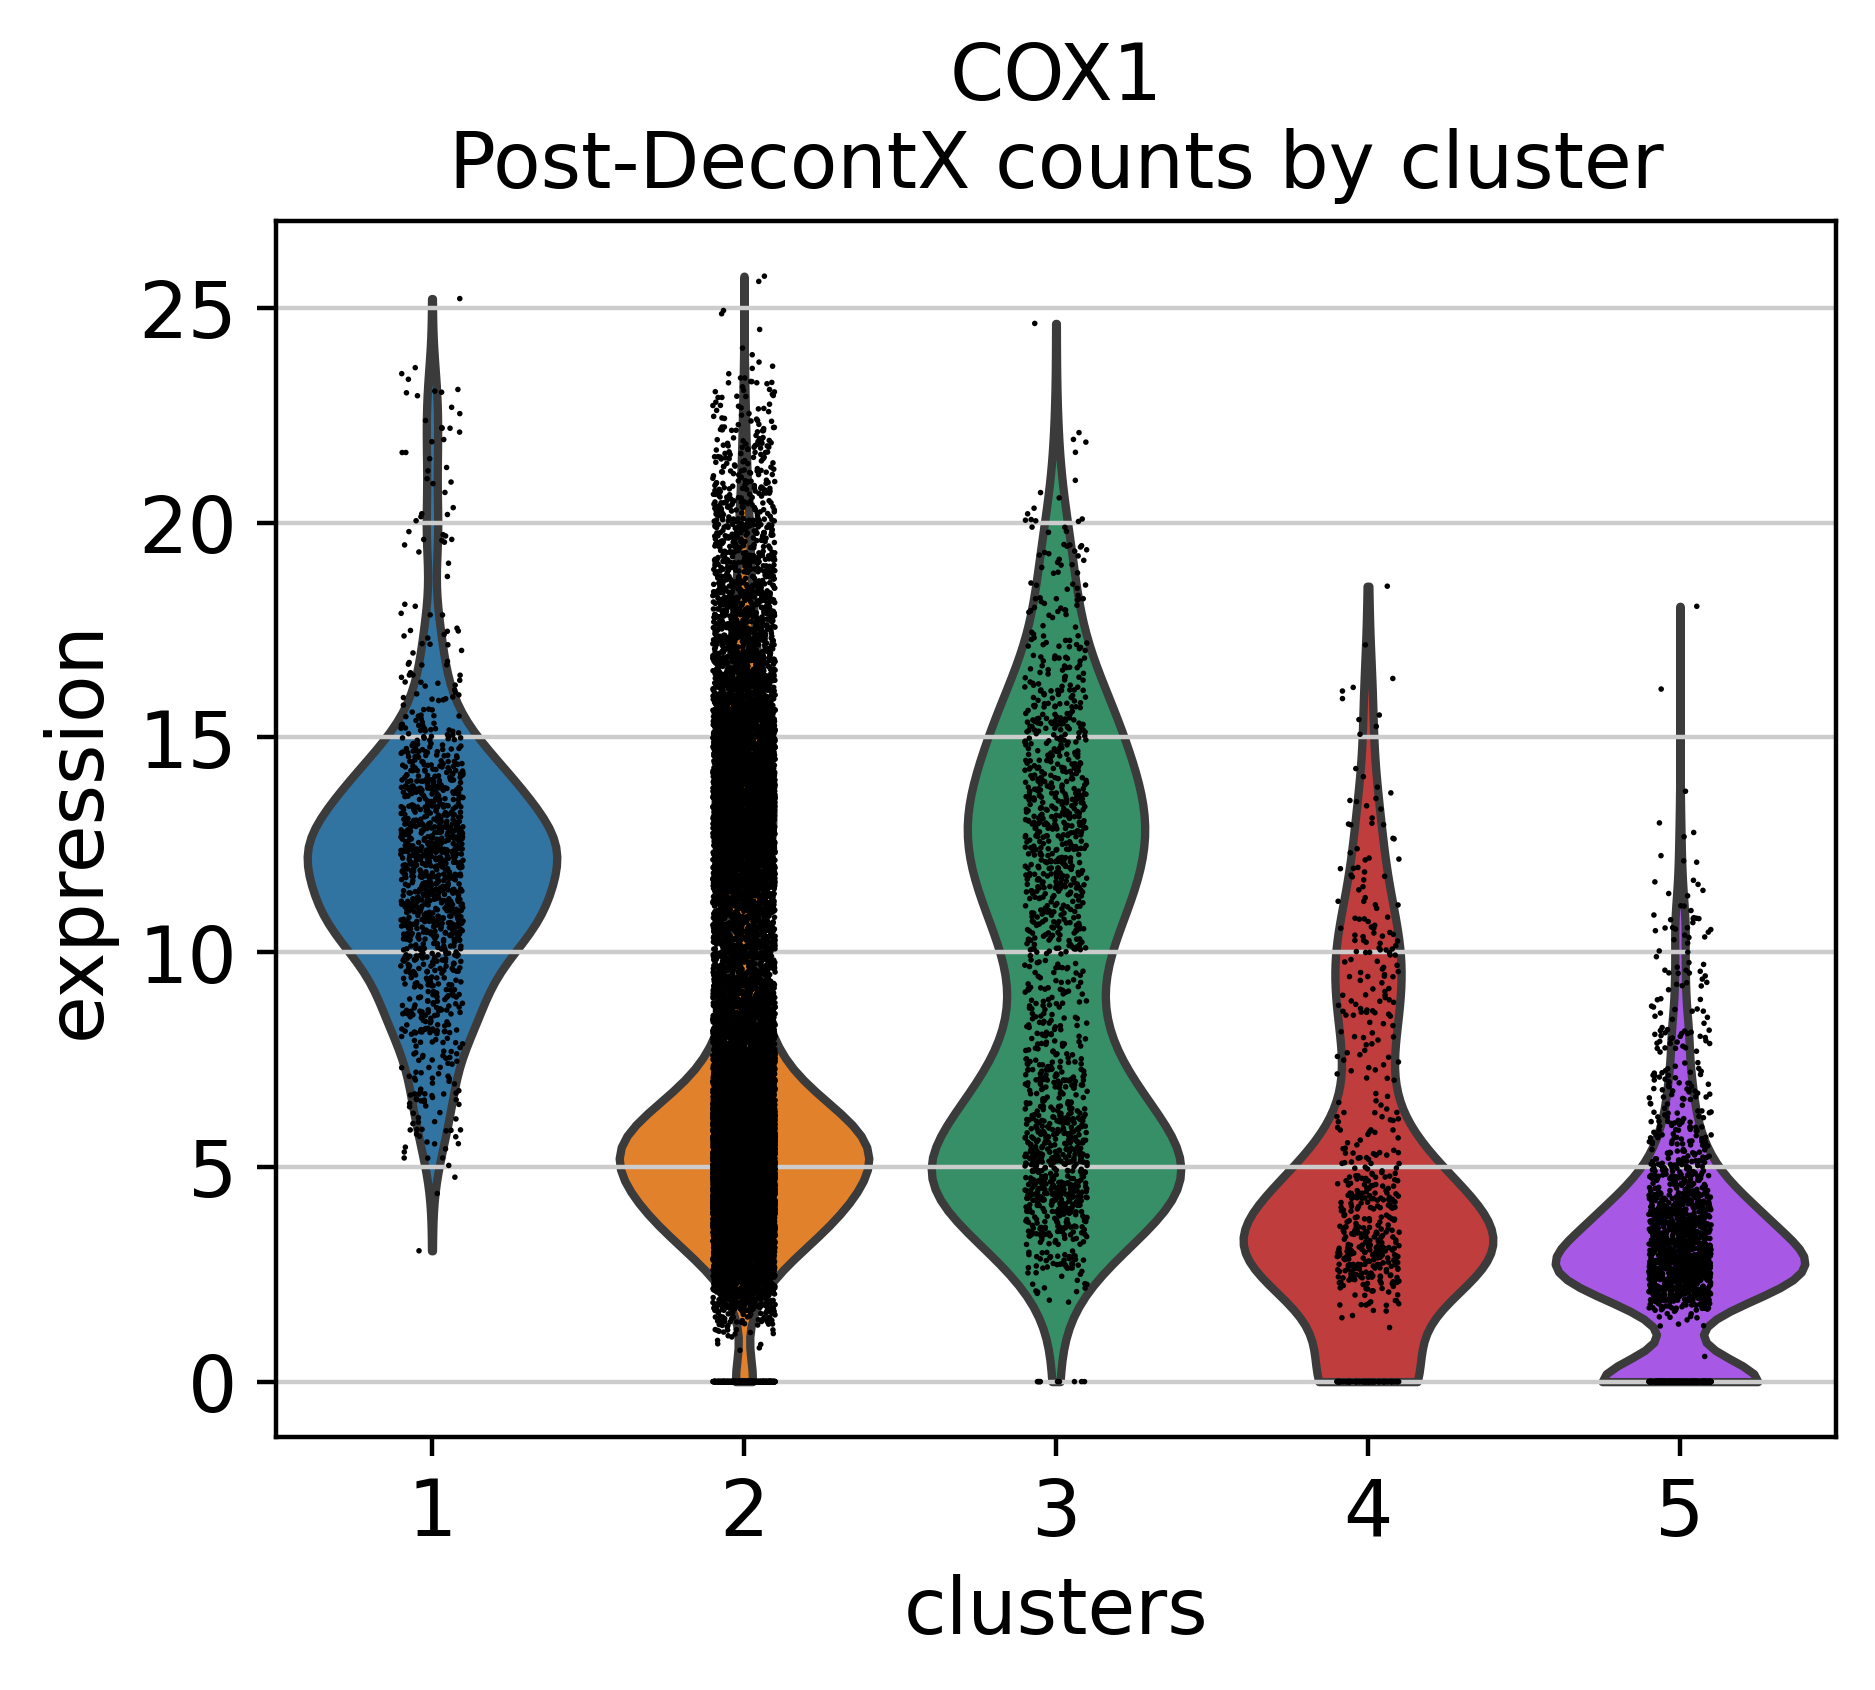

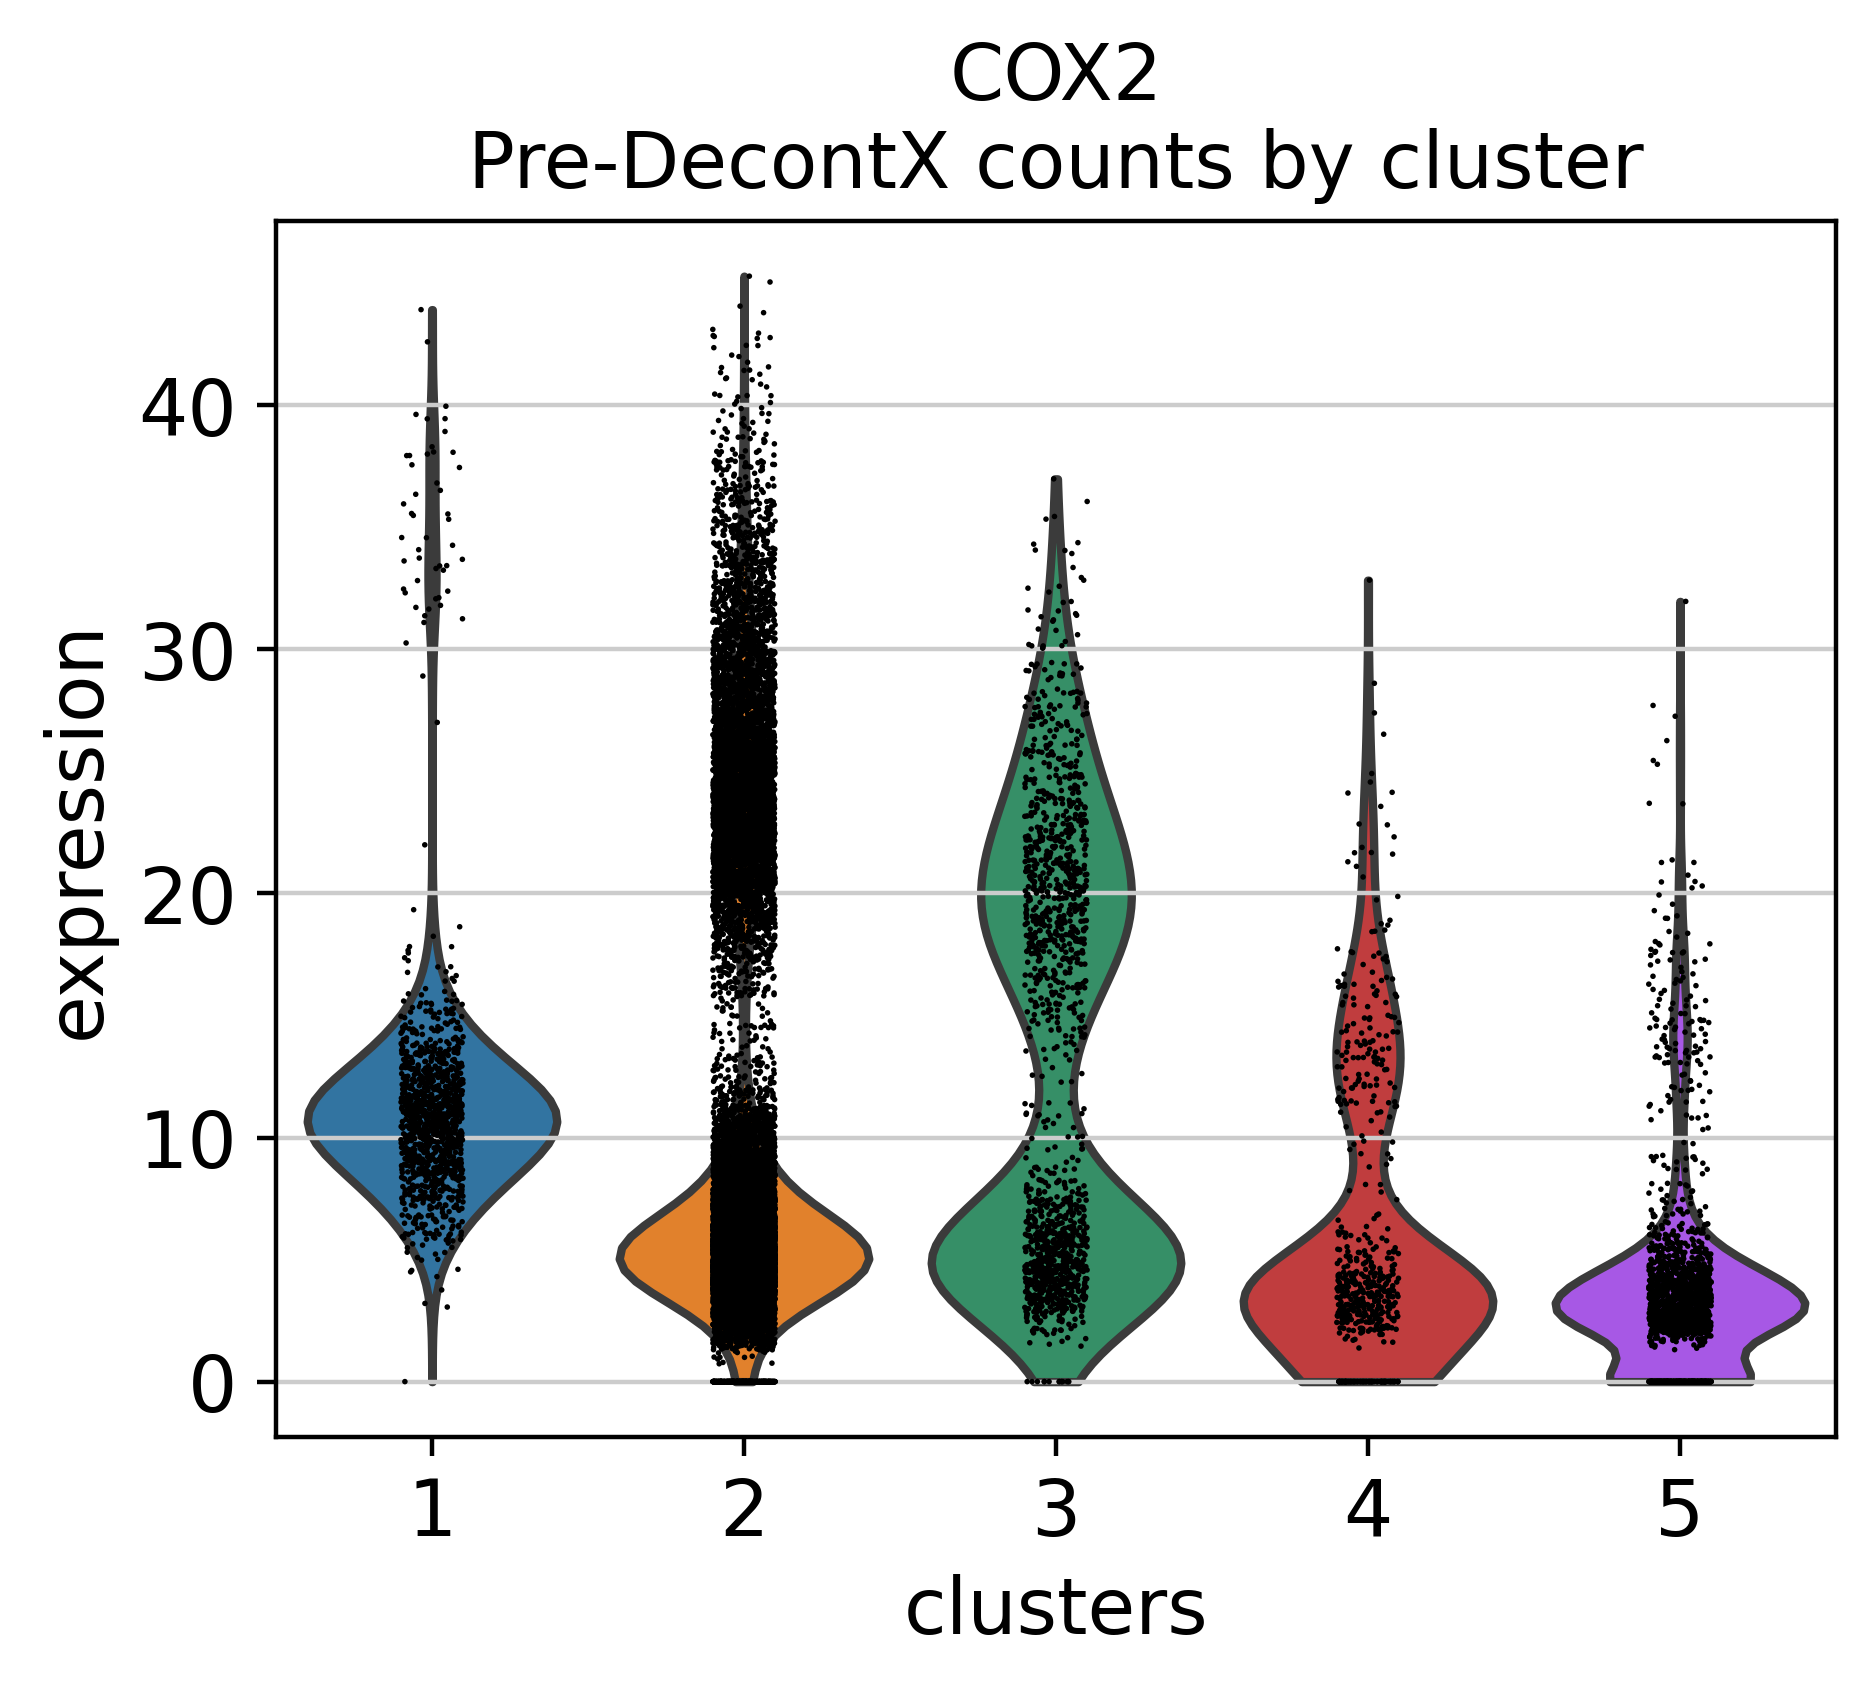

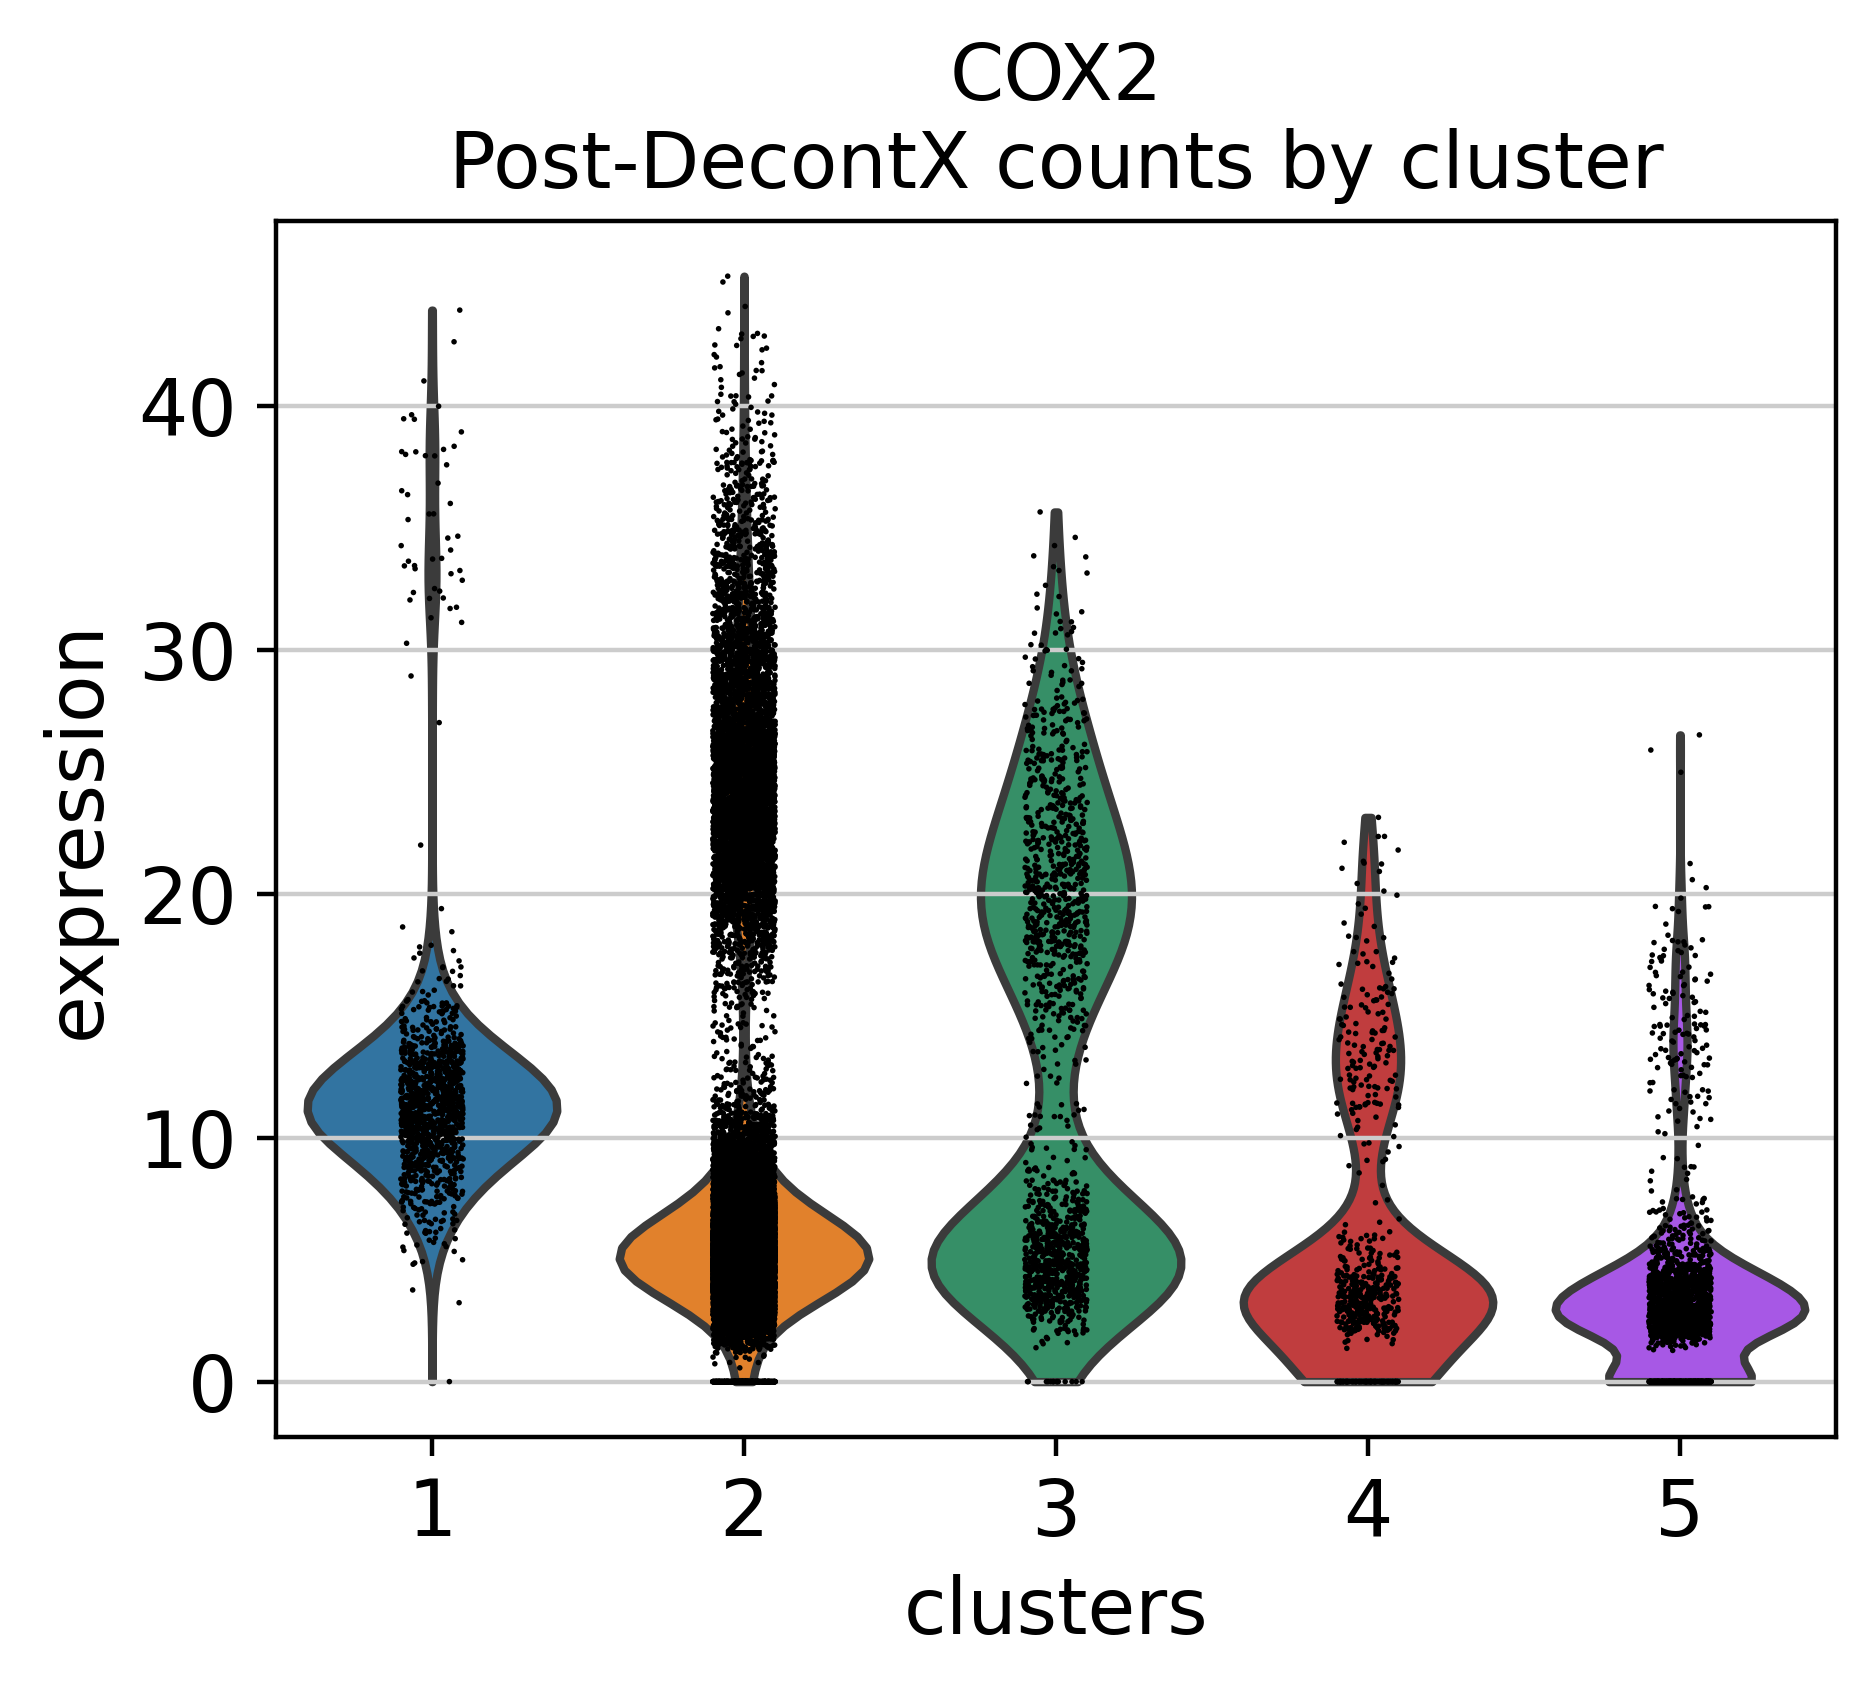

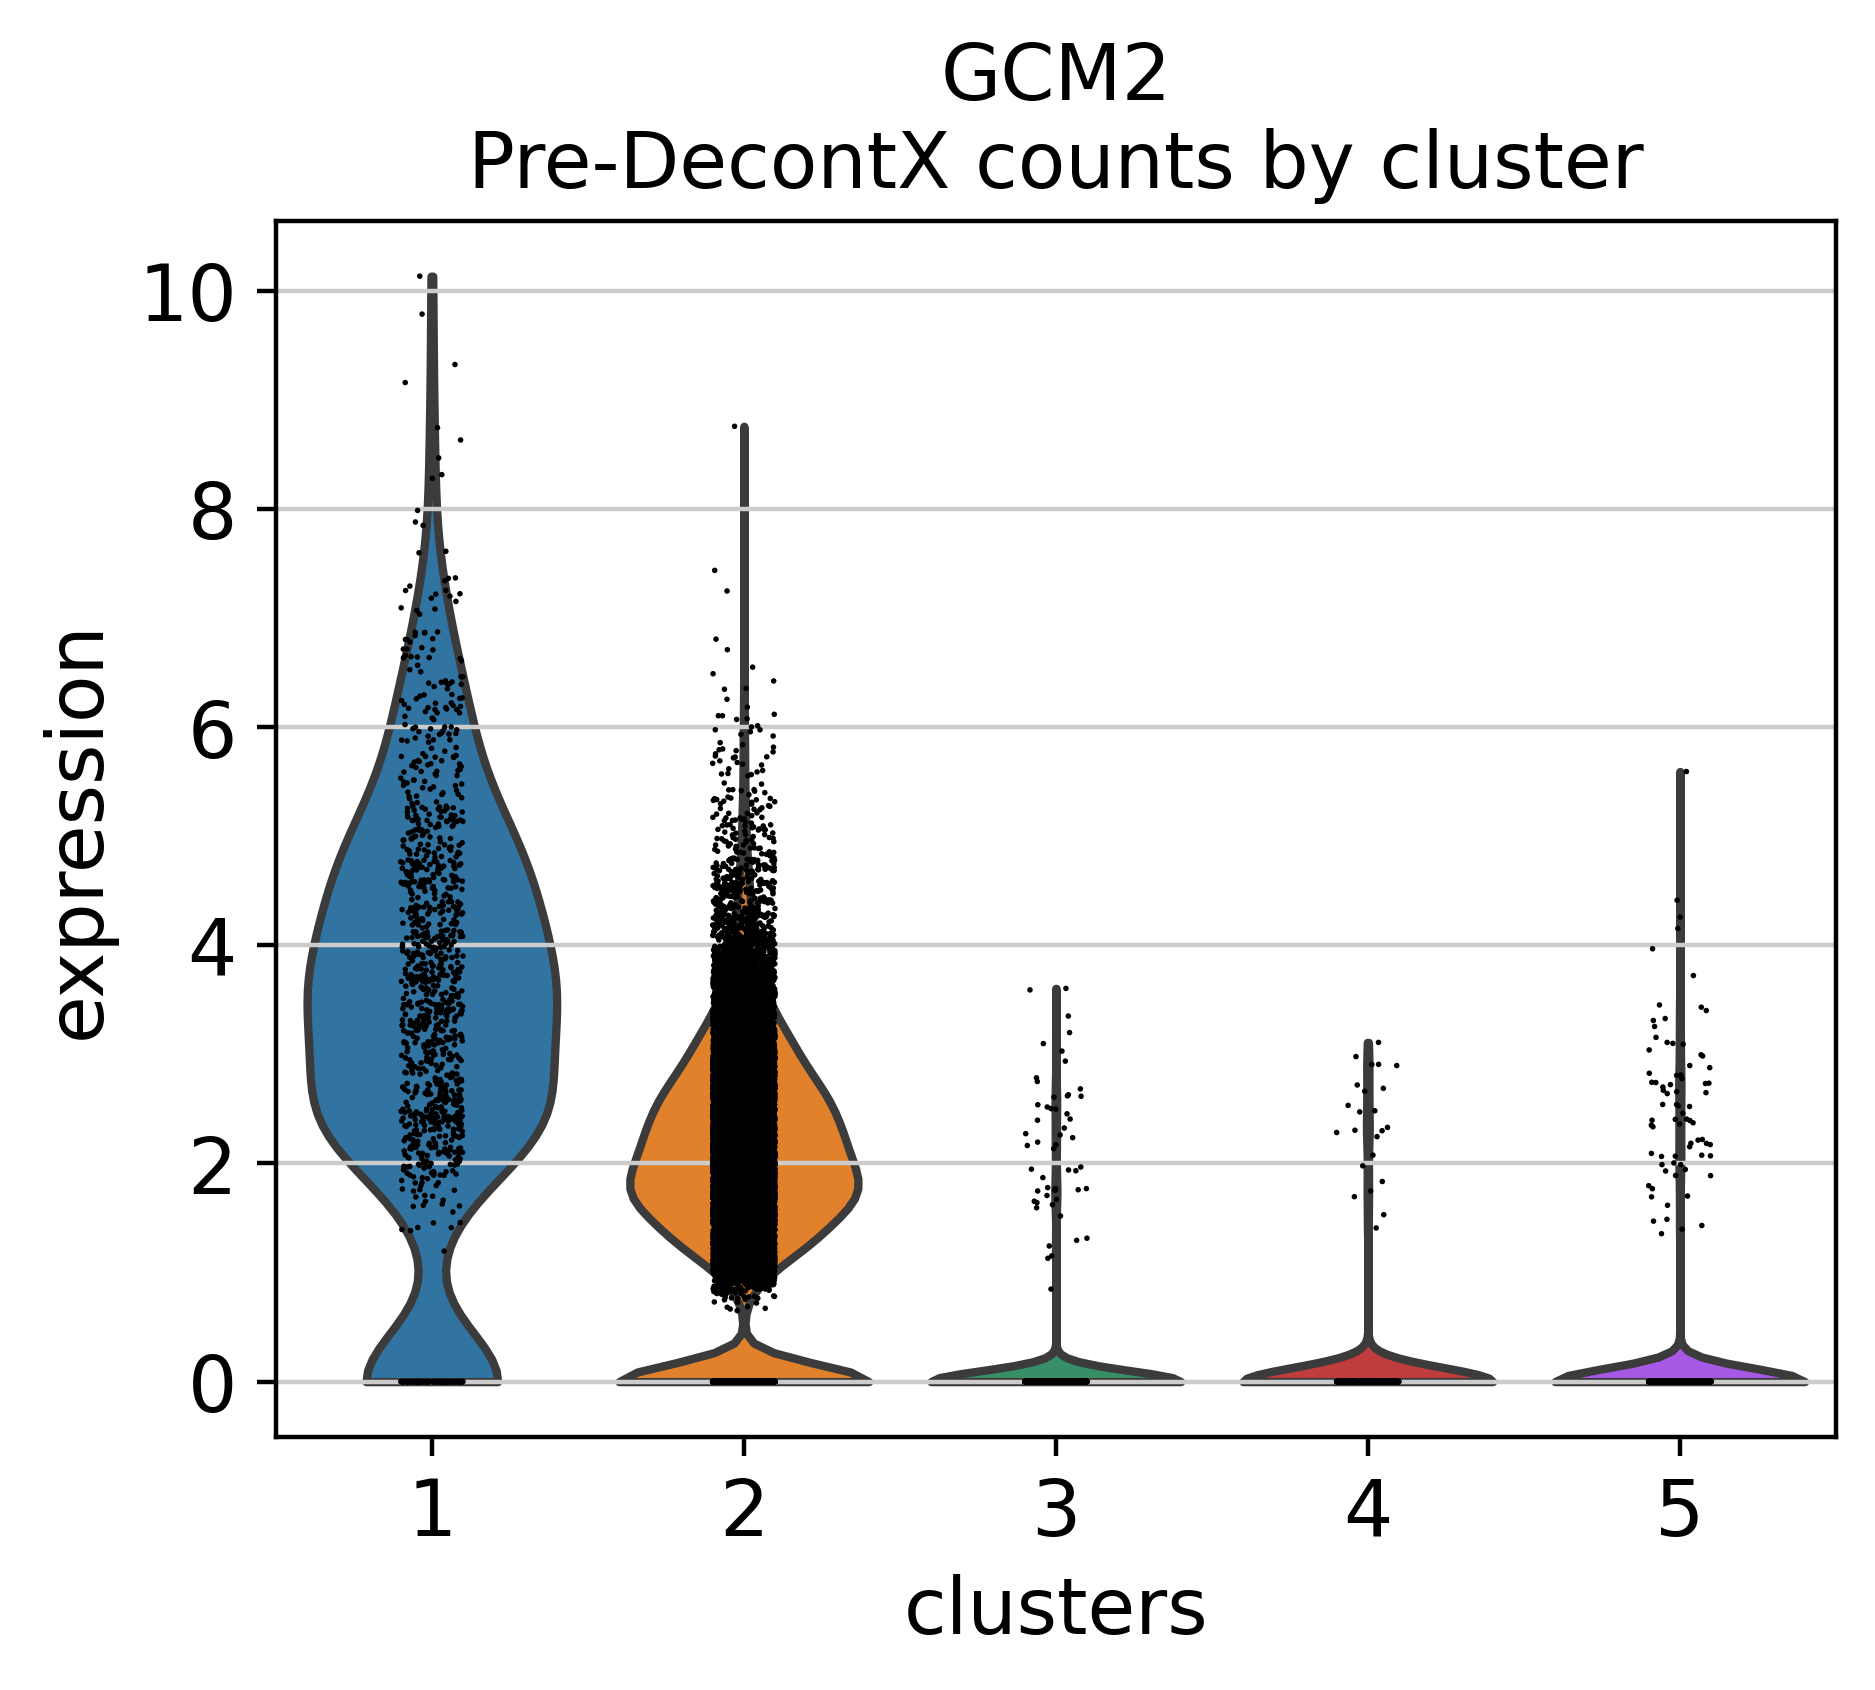

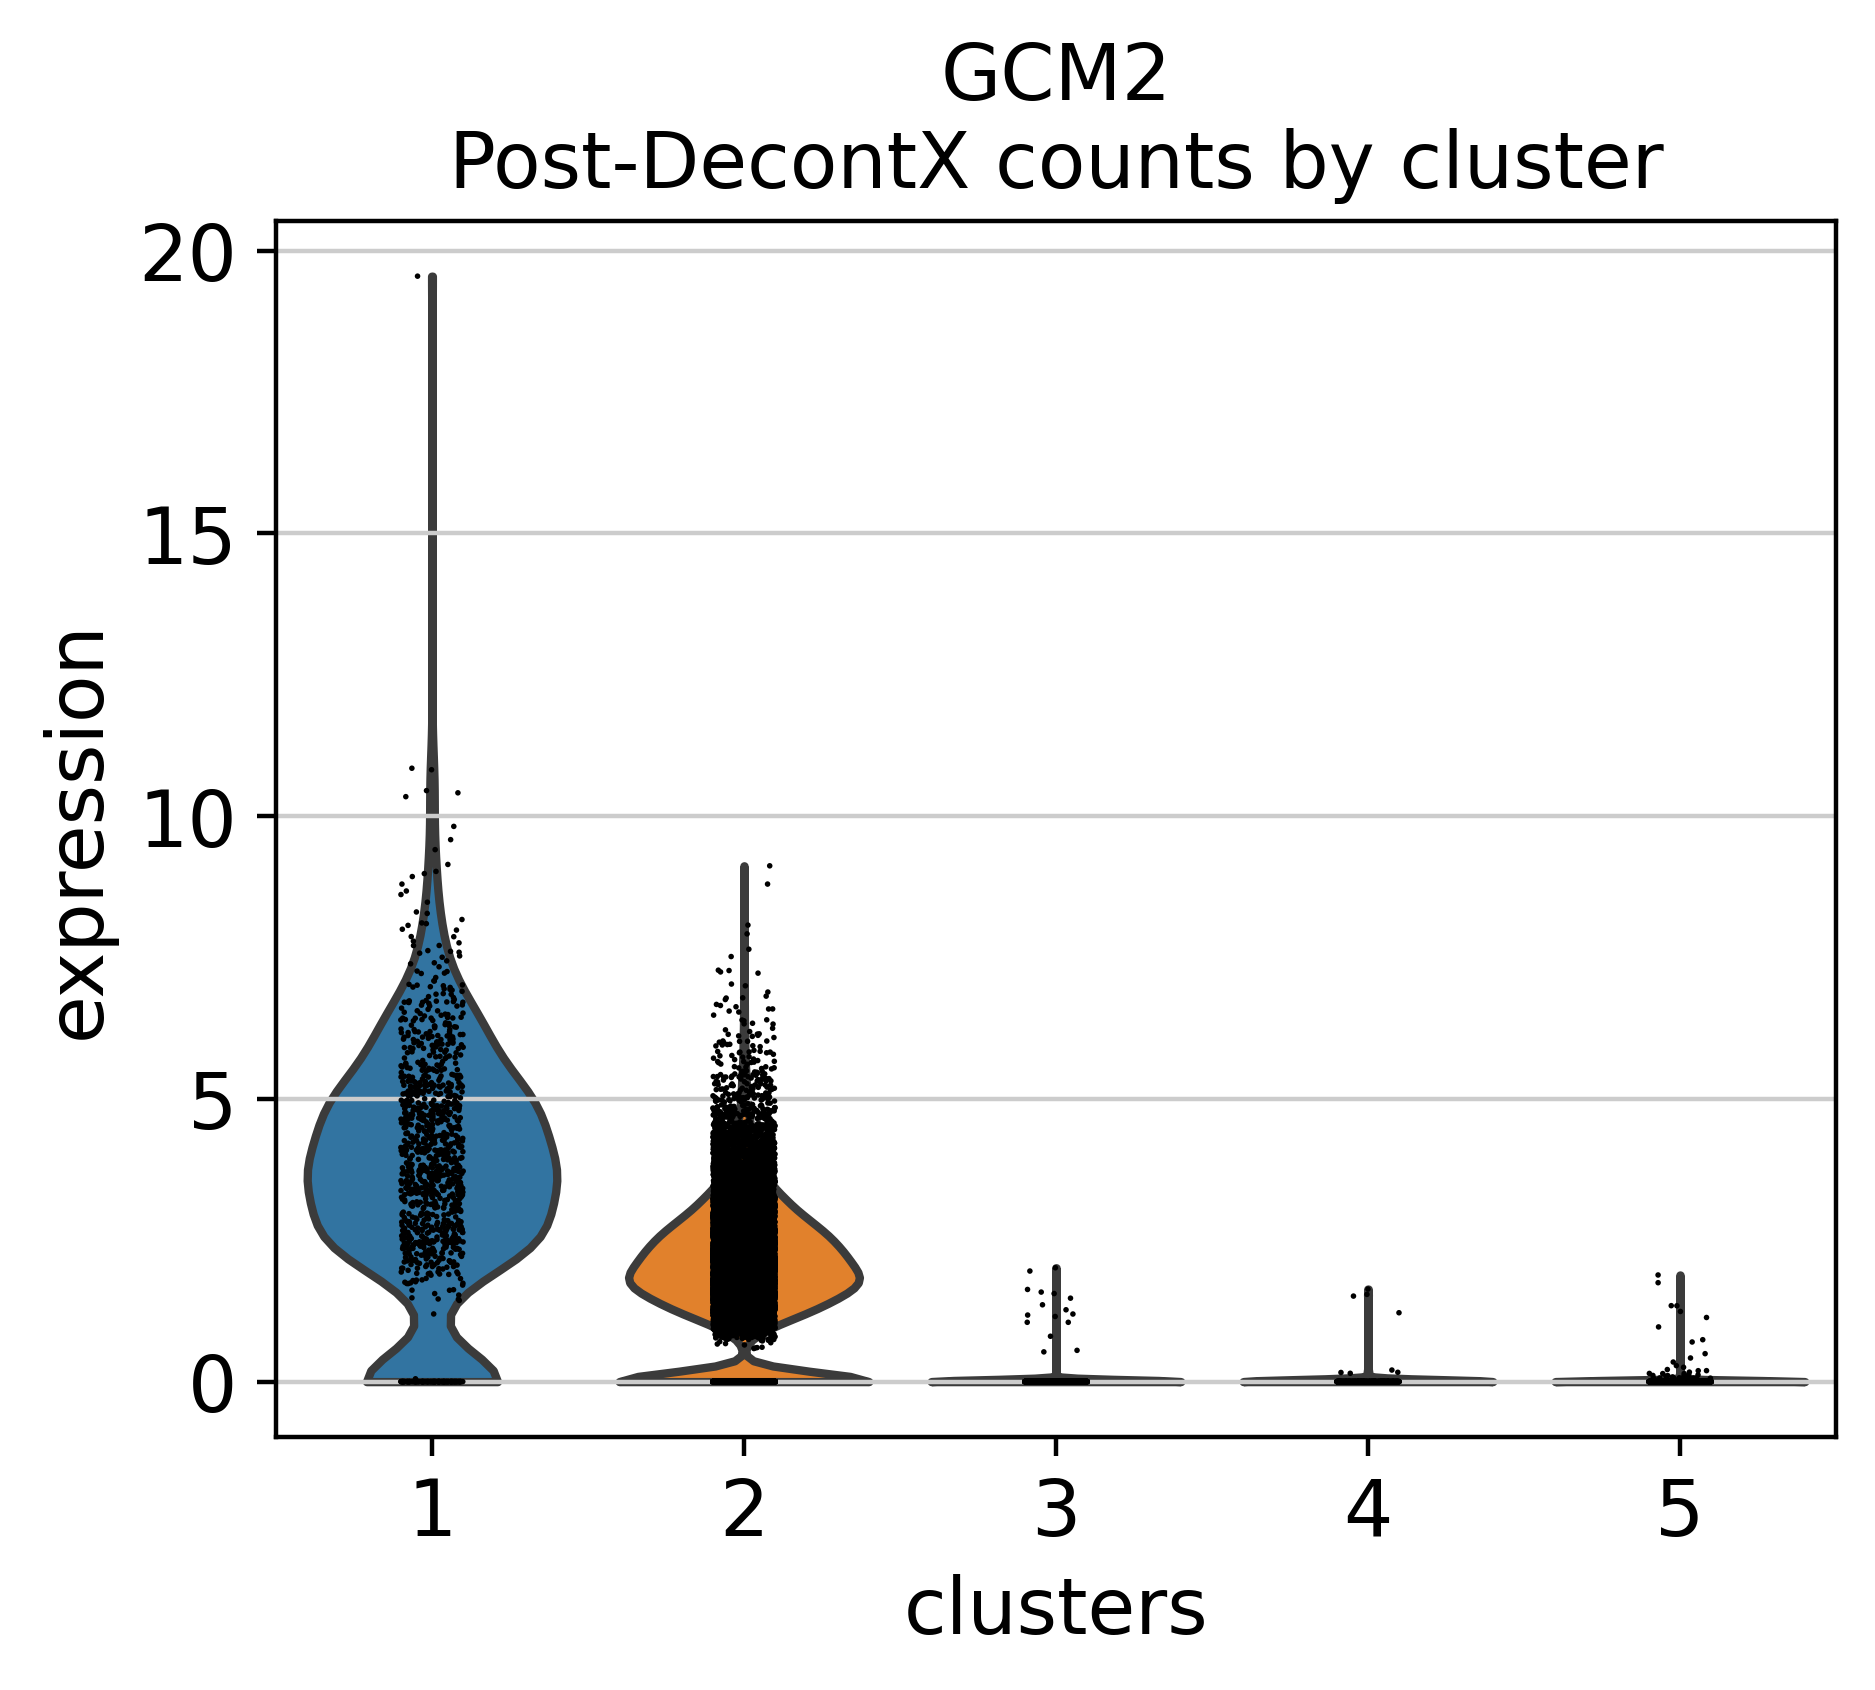

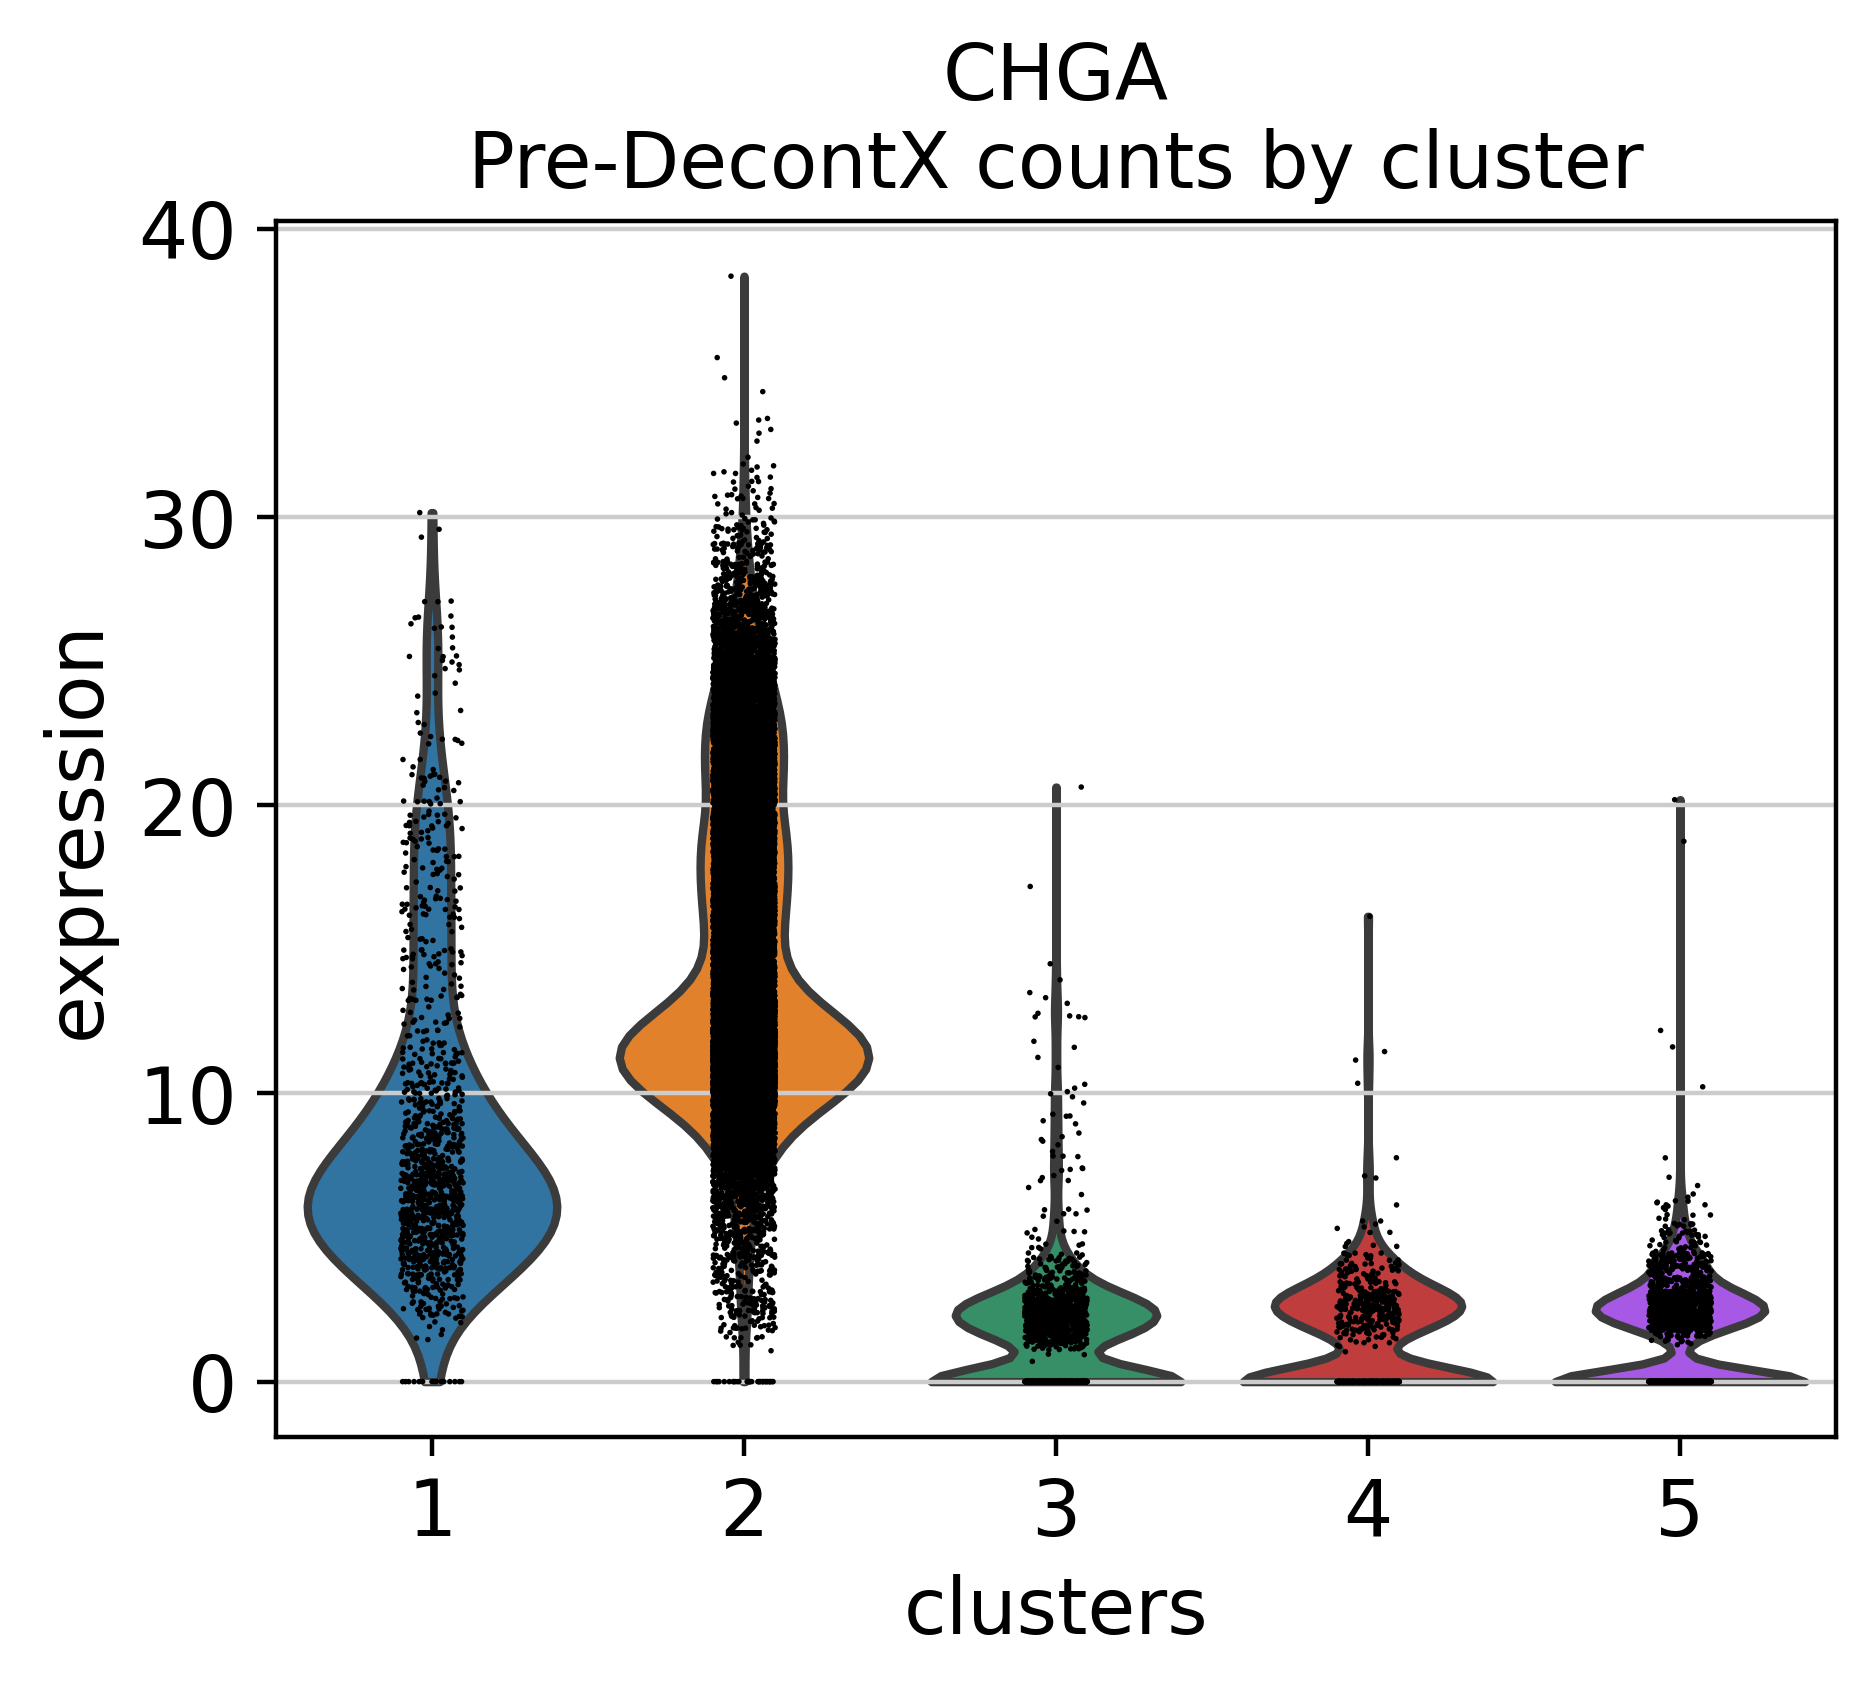

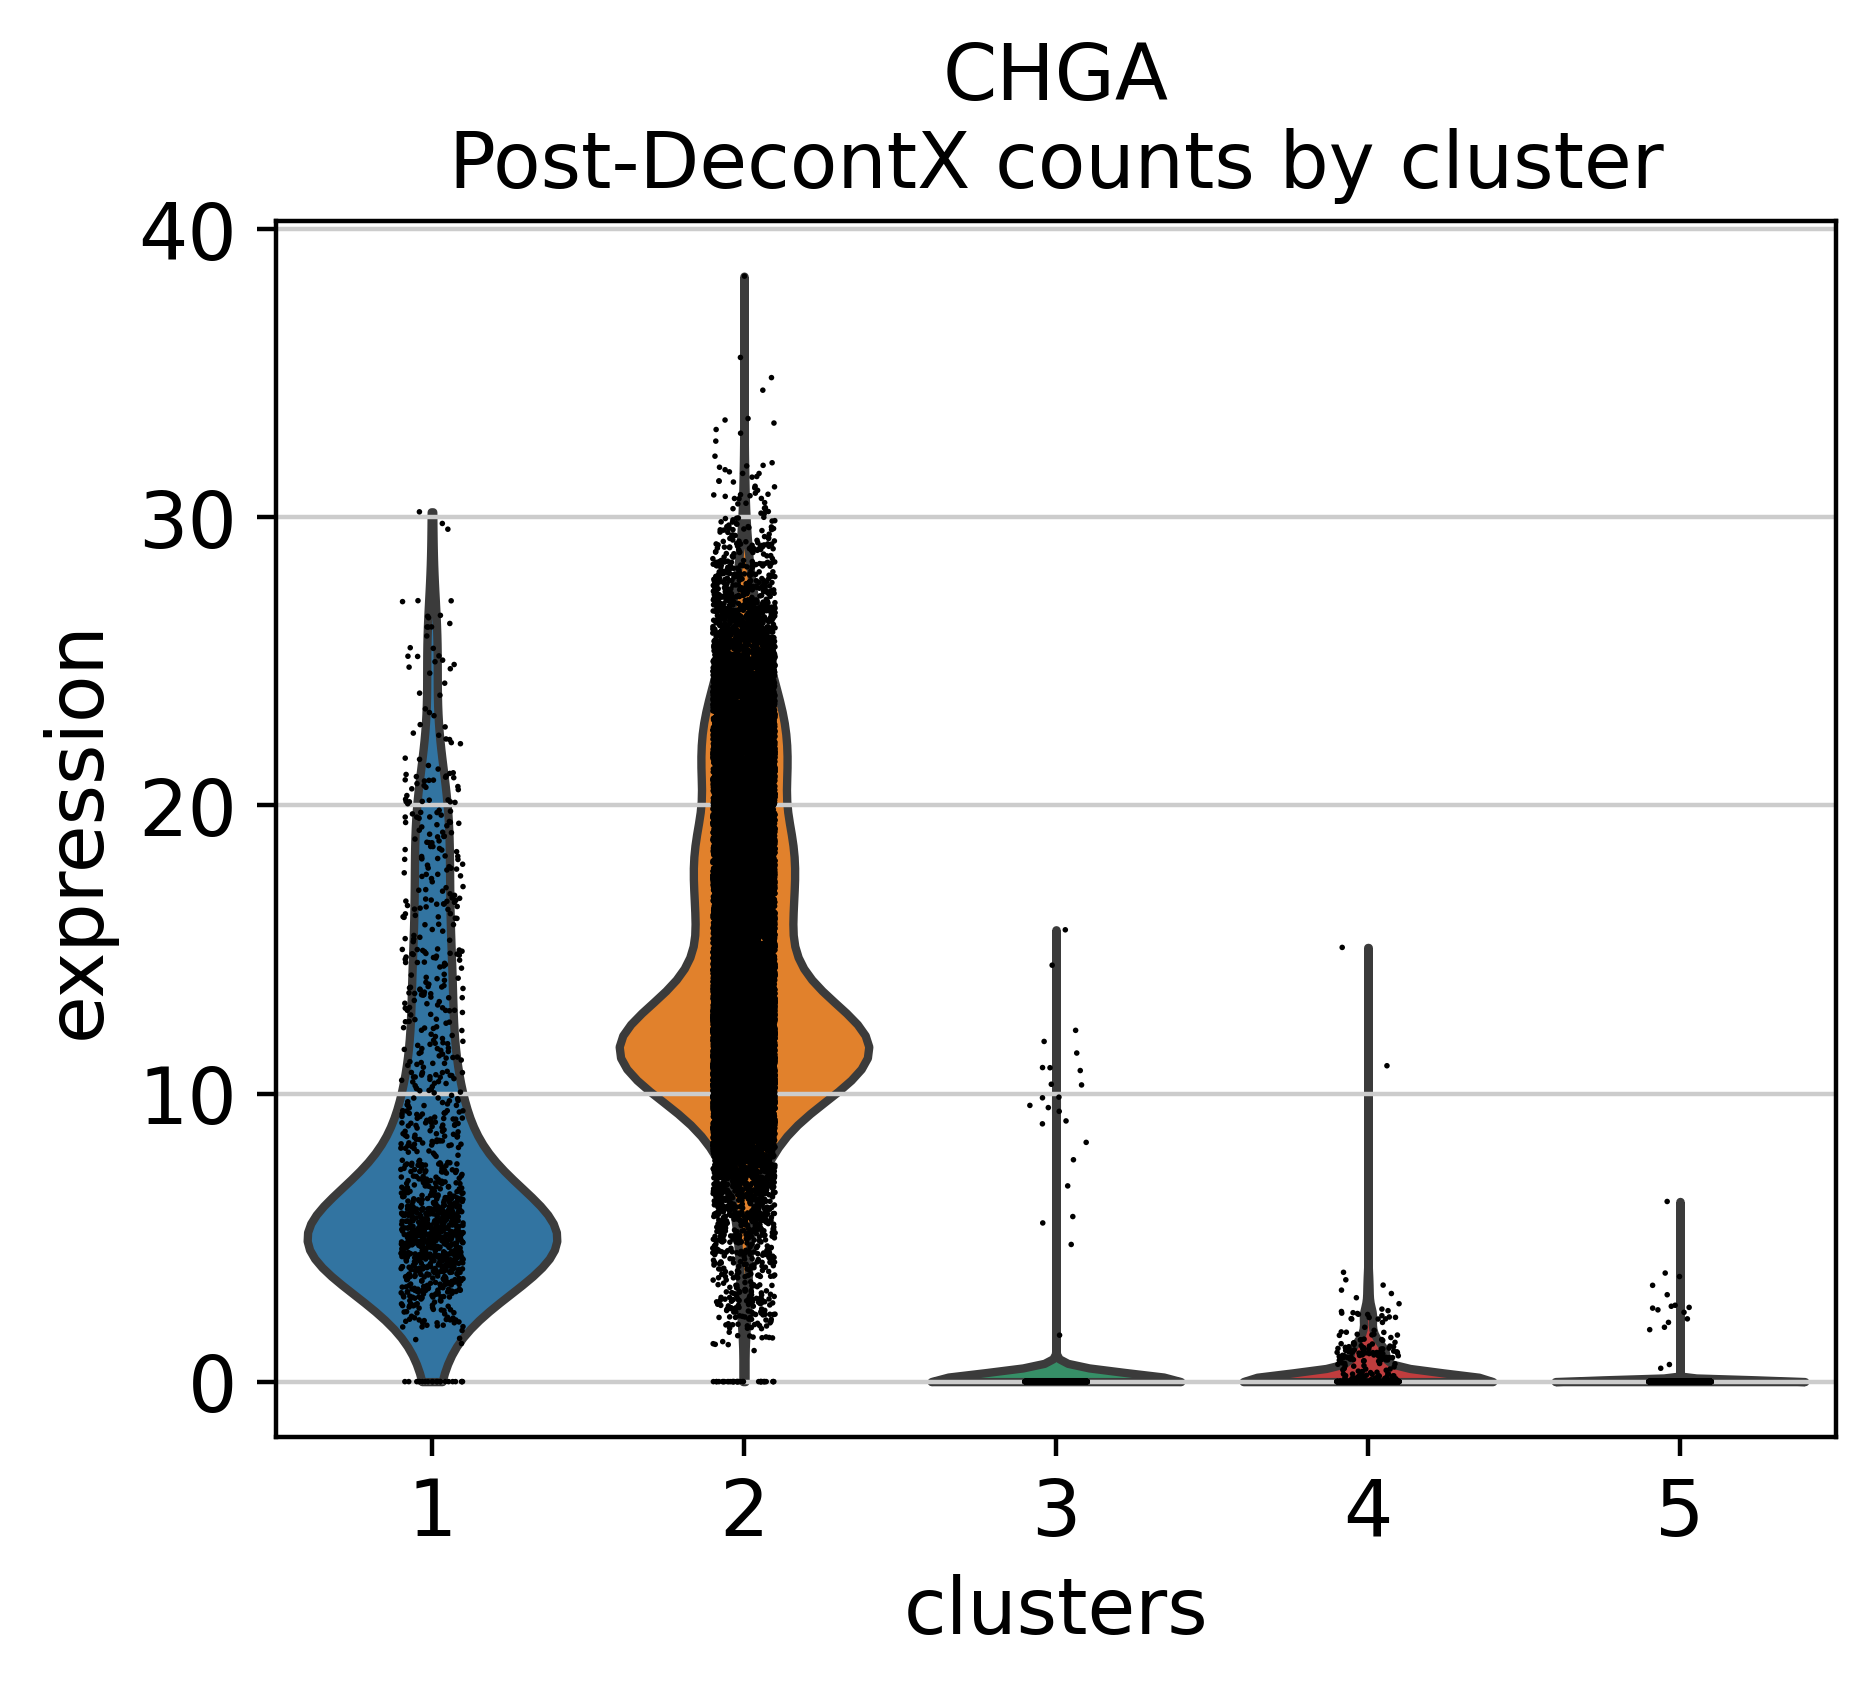

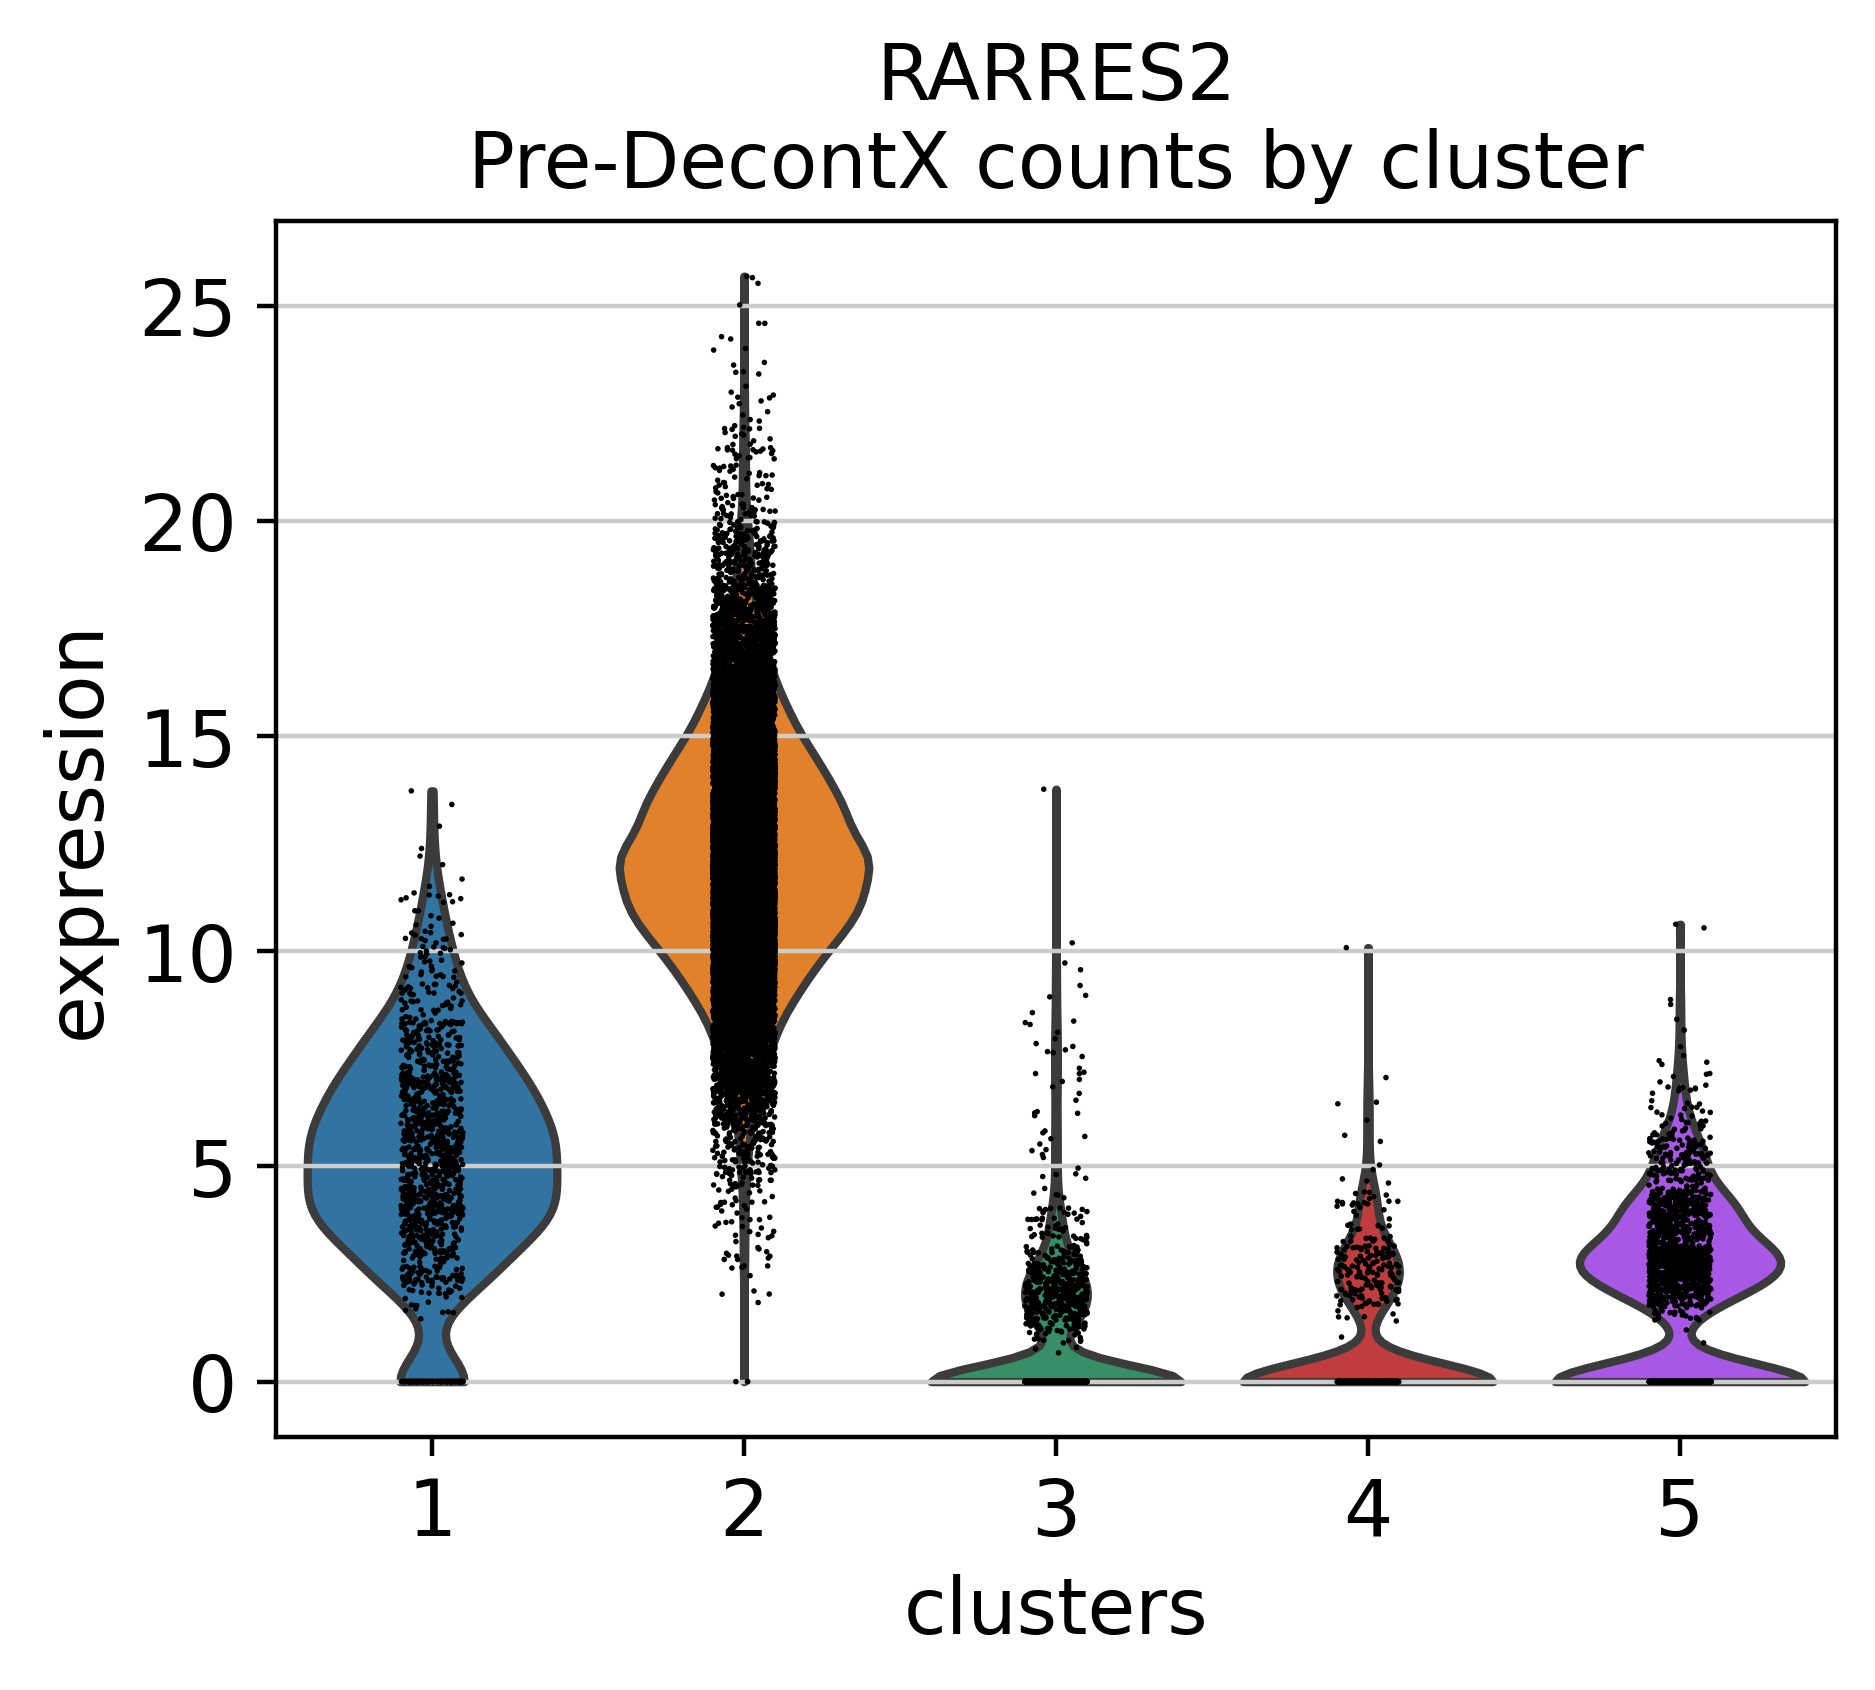

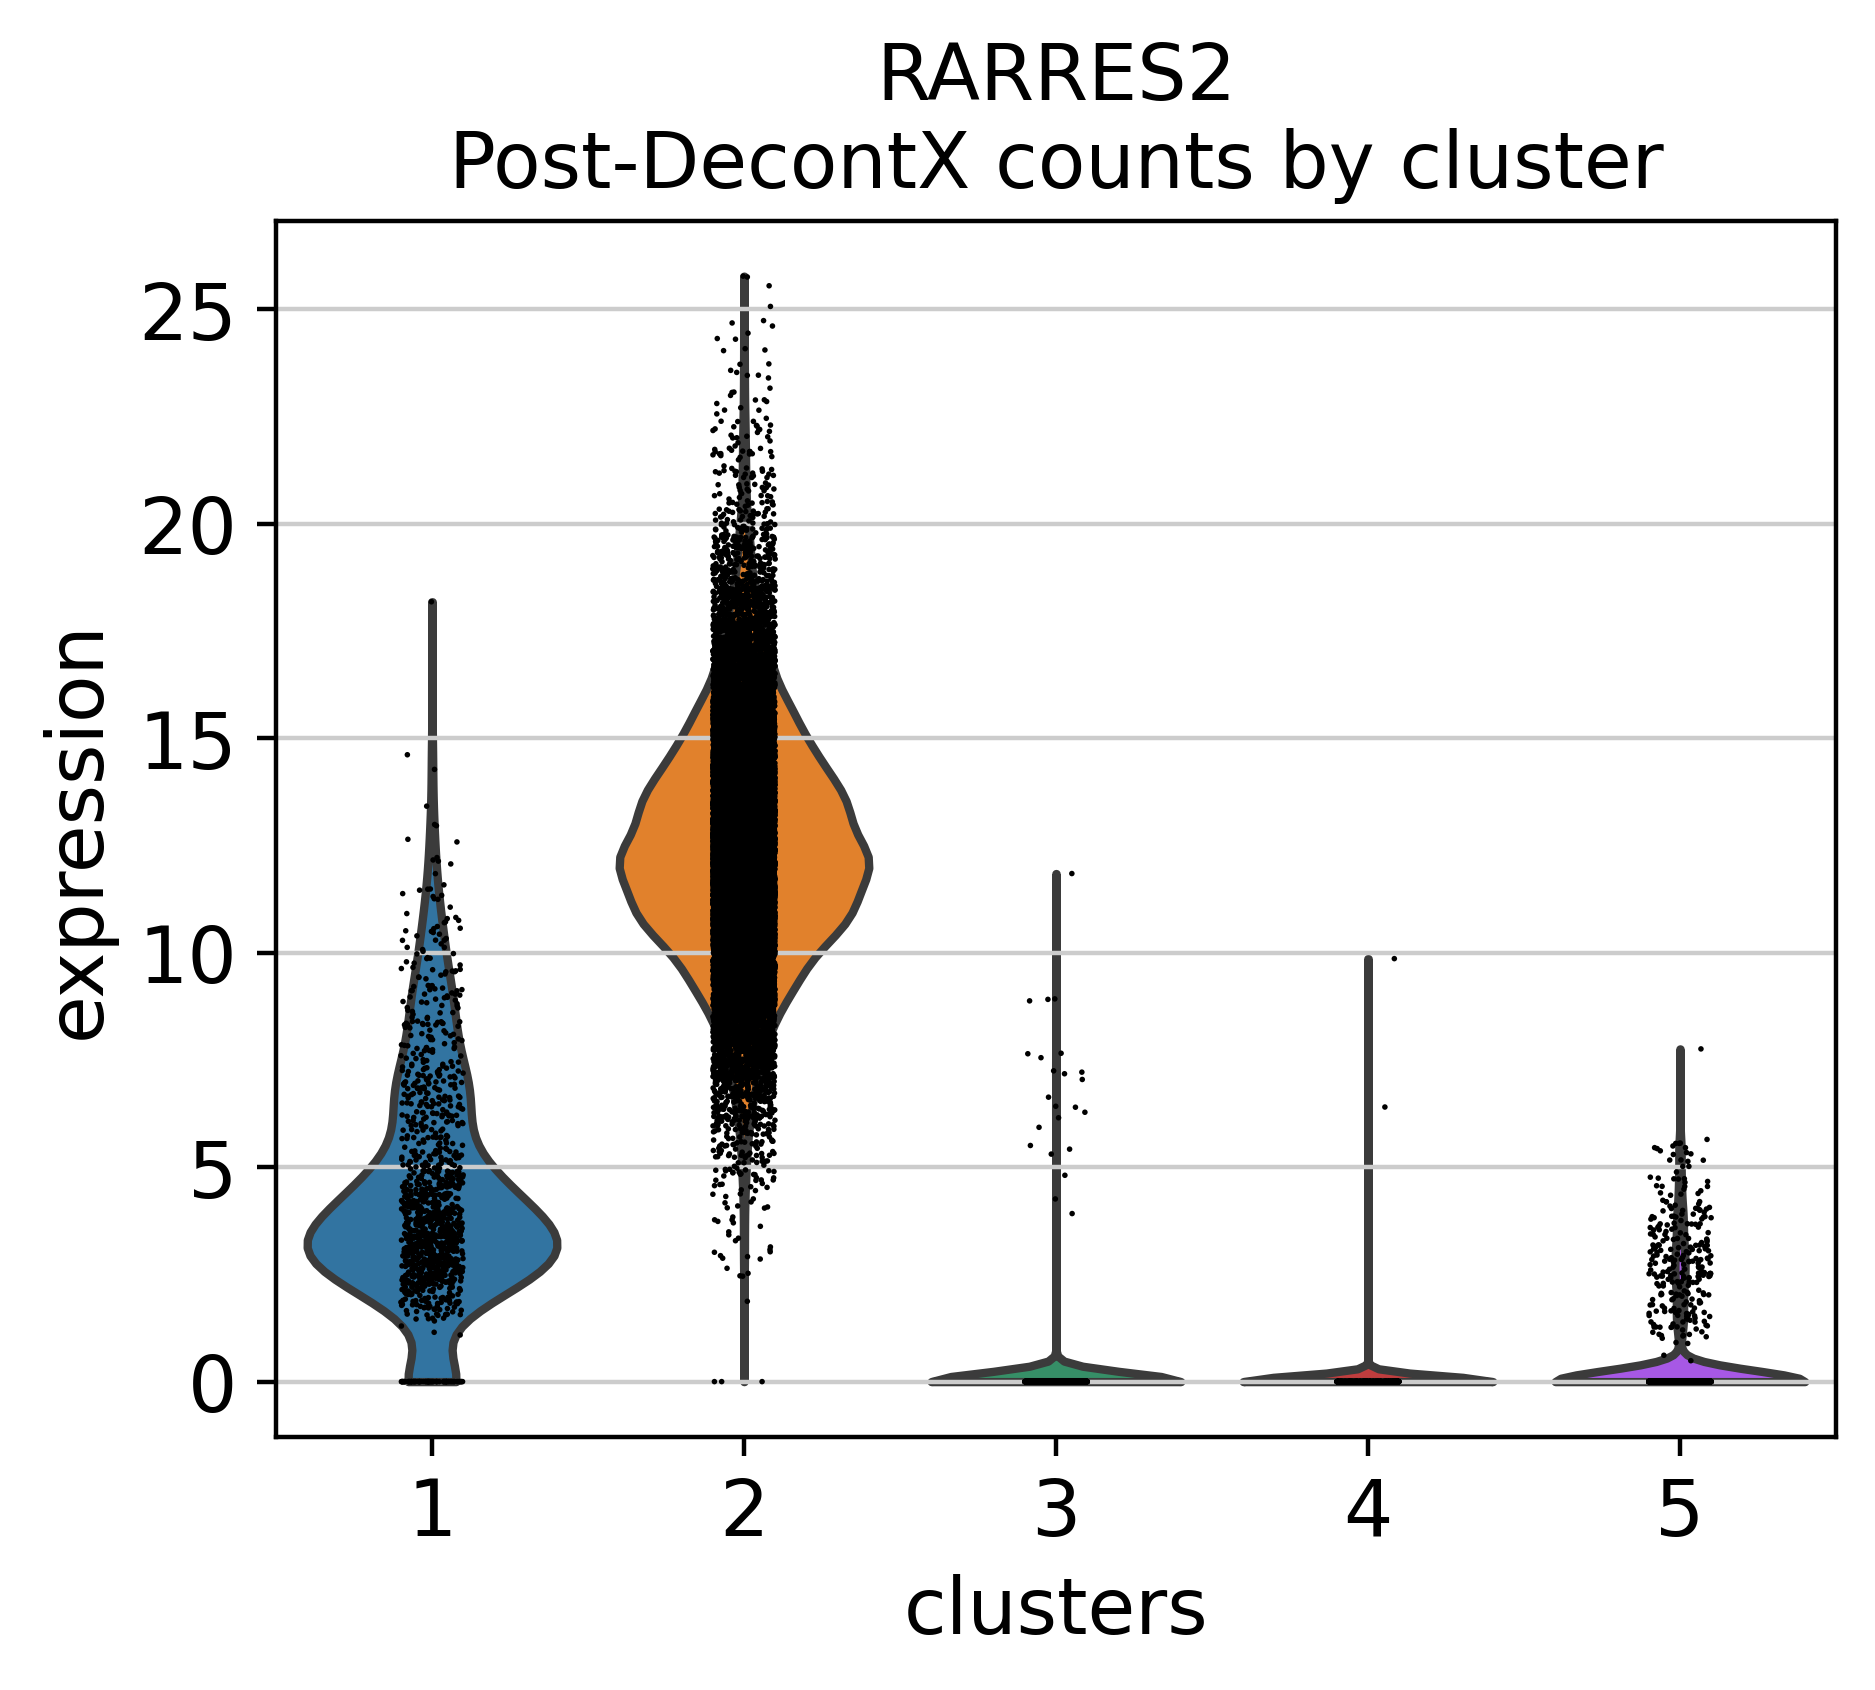

In [26]:
markers = ['PTH', 'COX1', 'COX2', 'GCM2', 'CHGA', 'RARRES2']
for marker in markers:
    fig,ax = plt.subplots(figsize=(5,4))
    ax.set_title(f'{marker}\nPre-DecontX counts by cluster')
    sc.pl.violin(sdata, keys=marker, groupby='clusters', save=f'_predecontx_primate_{marker}.png', ax=ax, ylabel='expression')
    
    fig,ax = plt.subplots(figsize=(5,4))
    ax.set_title(f'{marker}\nPost-DecontX counts by cluster')
    sc.pl.violin(adata, keys=marker, groupby='clusters', save=f'_postdecontx_primate_{marker}.png', ax=ax, ylabel='expression')